# Block Y1B: Creative Brief

## Project Overview
This project focuses on the analysis of diabetes patient data in order to apply in machine learning algorithms. <br>
It will involve the students working on a wide variety of machine learning techniques, ranging from basic data analysis to the optimisation of advanced models. 


## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## *Task 1: Exploratory Data Analysis (EDA) with Python and SQL
_________


### **Task 1A: Exploratory Data Analysis with SQL**

### Task Description

During the Week 1-DataLab II, you learned how to connect Python or any database tool such as DBeaver, PgAdmin to a database.<br> 
Here you can copy your SQL queries (or markdown text blocks) for Task 1A of exploratory data analysis with SQL.

### Task 1A.1: General Overview of the Data

In [2]:
# Count the total number of records in the encounter table
""" 
SELECT COUNT(*)
FROM encounter;
"""

# Check the distribution of different admission types
""" 
SELECT DISTINCT adt.description, COUNT(*)
FROM encounter AS e
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
GROUP BY adt.description;
"""
  
# Explore the top discharge dispositions
""" 
SELECT DISTINCT dd.description, COUNT(*) AS discharge_disposition_count
FROM encounter AS e
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
GROUP BY dd.description
ORDER BY discharge_disposition_count DESC;
"""

' \nSELECT DISTINCT dd.description, COUNT(*) AS discharge_disposition_count\nFROM encounter AS e\nLEFT JOIN discharge_disposition AS dd\nON e.discharge_disposition_id = dd.discharge_disposition_id\nGROUP BY dd.description\nORDER BY discharge_disposition_count DESC;\n'

### Task 1A.2: Identifying Missing or Anomalous Data

In [3]:
#Check for missing values in the race column (Hint: Count the occurance of each unique value in this column)
""" 
SELECT race, count(race)
FROM patient
GROUP BY race;
"""

#Check for missing or unusual values in the weight column
""" 
SELECT weight, count(weight) AS weight_count
FROM patient
GROUP BY weight
ORDER BY weight_count DESC; 
"""

' \nSELECT weight, count(weight) AS weight_count\nFROM patient\nGROUP BY weight\nORDER BY weight_count DESC; \n'

### Task 1A.3: Understanding Age Distribution

In [4]:
# Explore the age distribution of the patients
""" 
SELECT age, count(age)
FROM patient
WHERE age NOT LIKE '?'
GROUP BY age
ORDER BY age DESC; 
"""

" \nSELECT age, count(age)\nFROM patient\nWHERE age NOT LIKE '?'\nGROUP BY age\nORDER BY age DESC; \n"

### Task 1A.4: Admission Trends by Source and Type

In [5]:
# Analyze how different admission sources contribute to hospital admissions 
""" 
SELECT ads.description, COUNT(e.admission_source_id) AS as_count
FROM encounter AS e
LEFT JOIN admission_source AS ads
ON e.admission_source_id = ads.admission_source_id
GROUP BY ads.description
ORDER BY as_count DESC;
"""

#Investigate which admission types correspond to specific admission sources
"""
SELECT 
    ads.description AS AdmissionSource,
    adt.description AS AdmissionType, 
    COUNT(e.admission_source_id) AS SourceCount
FROM encounter AS e
LEFT JOIN admission_source AS ads
ON e.admission_source_id = ads.admission_source_id
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
WHERE ads.description NOT LIKE 'NULL'
GROUP BY ads.description, adt.description
ORDER BY SourceCount DESC;
"""

"\nSELECT \n    ads.description AS AdmissionSource,\n    adt.description AS AdmissionType, \n    COUNT(e.admission_source_id) AS SourceCount\nFROM encounter AS e\nLEFT JOIN admission_source AS ads\nON e.admission_source_id = ads.admission_source_id\nLEFT JOIN admission_type AS adt\nON e.admission_type_id = adt.admission_type_id\nWHERE ads.description NOT LIKE 'NULL'\nGROUP BY ads.description, adt.description\nORDER BY SourceCount DESC;\n"

### Task 1A.5: Hospital Stay and Readmission Patterns

In [6]:
# Find the average time in hospital for each admission type
""" 
SELECT adt.description, ROUND(AVG(e.time_in_hospital), 2) as avg_time
FROM encounter AS e
LEFT JOIN admission_type as adt
ON adt.admission_type_id = e.admission_type_id
WHERE adt.description NOT LIKE 'NULL'
GROUP BY adt.description
ORDER BY avg_time DESC; 
"""


#Investigate readmission rates by admission type
""" 
SELECT adt.description, e.readmitted, COUNT(e.readmitted) as readmitted_count
FROM encounter AS e
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
WHERE adt.description NOT LIKE 'NULL'
GROUP BY adt.description, e.readmitted
ORDER BY readmitted_count DESC;
"""

" \nSELECT adt.description, e.readmitted, COUNT(e.readmitted) as readmitted_count\nFROM encounter AS e\nLEFT JOIN admission_type AS adt\nON e.admission_type_id = adt.admission_type_id\nWHERE adt.description NOT LIKE 'NULL'\nGROUP BY adt.description, e.readmitted\nORDER BY readmitted_count DESC;\n"

### Task 1A.6: Comparing Admission Types and Outcomes

In [7]:
# Compare discharge dispositions across different admission types
""" 
SELECT 
    adt.description as AdmissionType, 
    dd.description AS DischargeDisposition
FROM encounter AS e
LEFT JOIN admission_type AS adt
ON e.admission_type_id = adt.admission_type_id
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
WHERE adt.description != 'NULL'
AND dd.description != 'NULL'
GROUP BY adt.description, dd.description;
"""

# Compare readmission rates by discharge disposition
""" 
SELECT dd.description, COUNT(e.readmitted) AS readmitted_count
FROM encounter AS e
LEFT JOIN discharge_disposition AS dd
ON e.discharge_disposition_id = dd.discharge_disposition_id
WHERE dd.description != 'NULL'
AND e.readmitted != 'NO'
GROUP BY dd.description
ORDER BY readmitted_count DESC;
"""

" \nSELECT dd.description, COUNT(e.readmitted) AS readmitted_count\nFROM encounter AS e\nLEFT JOIN discharge_disposition AS dd\nON e.discharge_disposition_id = dd.discharge_disposition_id\nWHERE dd.description != 'NULL'\nAND e.readmitted != 'NO'\nGROUP BY dd.description\nORDER BY readmitted_count DESC;\n"

+++++
### **Task 1B: Exploratory Data Analysis with Python**

### Task Description
Perform comprehensive exploratory data analysis to understand the dataset's characteristics, patterns, and potential challenges. <br>
It is crucial to understand the structure and quality of the dataset before diving into any analysis or modeling.

### 1B.1: Load and Analyse the Dataset Shape:

In [ ]:
# Load the dataset
diabetes_dataset = pd.read_csv('./Data/diabetic_data.csv')

In [9]:
# Display first few rows
diabetes_dataset.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
# Dataset shape
print('Shape of the diabetes_dataset:', diabetes_dataset.shape)

Shape of the diabetes_dataset: (101766, 50)


In [11]:
# Column names
pd.DataFrame(diabetes_dataset.columns, columns=['column_name'])

,column_name
0,encounter_id
1,patient_nbr
2,race
3,gender
4,age
5,weight
6,admission_type_id
7,discharge_disposition_id
8,admission_source_id
9,time_in_hospital


### 1B.2: Load and Explore a Dataset Using NumPy

In [ ]:
# Load the dataset
data = np.genfromtxt(fname='./Data/diabetic_data.csv', delimiter=',', skip_header=1)

In [13]:
# Check the shape of the dataset
print("Dataset shape:", np.shape(data))

Dataset shape: (101766, 50)


In [14]:
# Preview the first few rows
print("First 5 rows of the dataset:\n", data[:5])

First 5 rows of the dataset:
 [[2.2783920e+06 8.2221570e+06           nan           nan           nan
            nan 6.0000000e+00 2.5000000e+01 1.0000000e+00 1.0000000e+00
            nan           nan 4.1000000e+01 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5083000e+02           nan
            nan 1.0000000e+00           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan
            nan           nan           nan           nan           nan]
 [1.4919000e+05 5.5629189e+07           nan           nan           nan
            nan 1.0000000e+00 1.0000000e+00 7.0000000e+00 3.0000000e+00
            nan           nan 5.9000000e+01 0.0000000e+00 1.8000000e+01
  0.0000000e+00 0.0000000e+00 0.0

### 1B.3: Analysing Data Types:

In [15]:
# Data types
pd.DataFrame(diabetes_dataset.dtypes, columns=['dtype'])

,dtype
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [16]:
# Unique values in categorical columns
dataset_categories = diabetes_dataset.select_dtypes('object')
for column in dataset_categories.columns:
    print(dataset_categories[column].value_counts())
    print('---')

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
---
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
---
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
---
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
---
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
---
medic

### 1B.4: Exploratory Data Analysis (EDA) with Visualisations

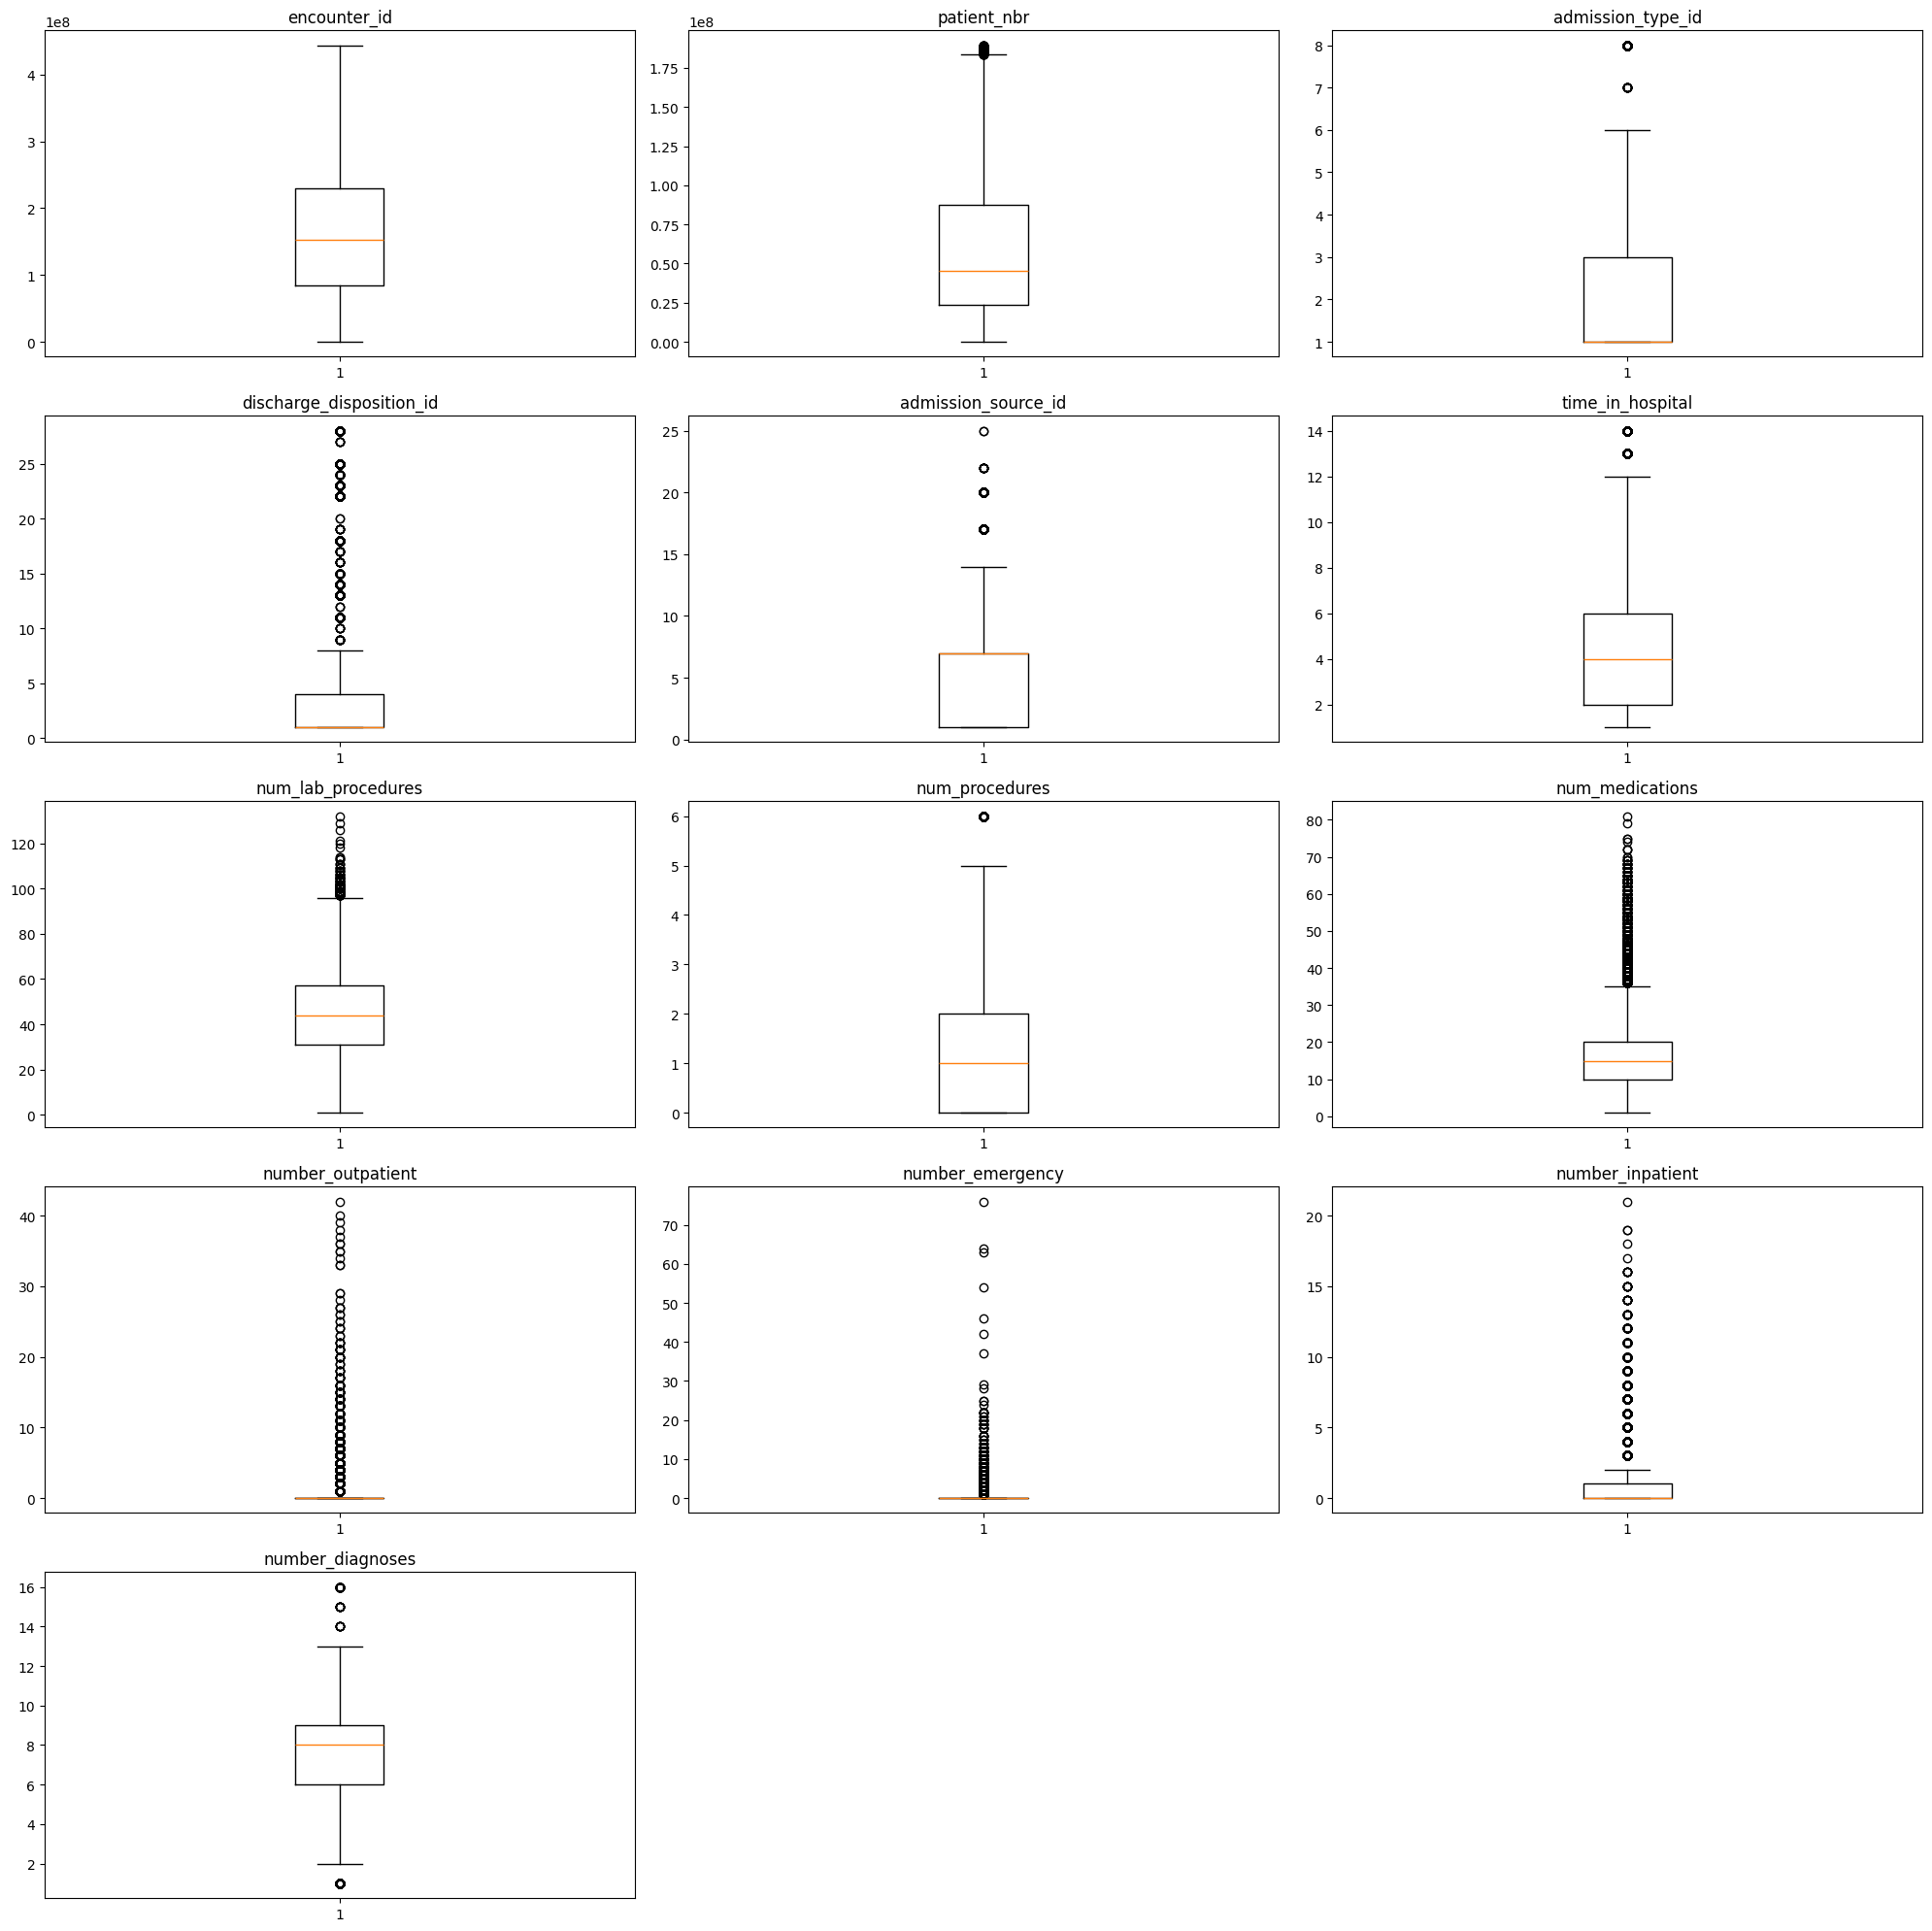

In [17]:
# Boxplot to detect outliers
diabetes_num = diabetes_dataset.select_dtypes('number')

num_columns = len(diabetes_num.columns)
num_rows = (num_columns + 2) // 3  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, num_rows * 4))
axes = axes.flatten() 

for i, column in enumerate(diabetes_num.columns):
    ax = axes[i]
    ax.boxplot(diabetes_num[column])
    ax.set_title(column)

# Hide unused subplots
for i in range(len(diabetes_num.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='count'>

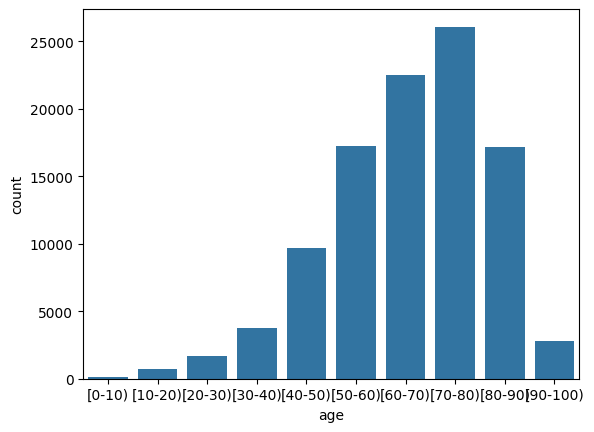

In [18]:
# Create a bar chart to show the number of patients in each age group
sns.countplot(data=diabetes_dataset, x='age')

<Axes: xlabel='gender', ylabel='count'>

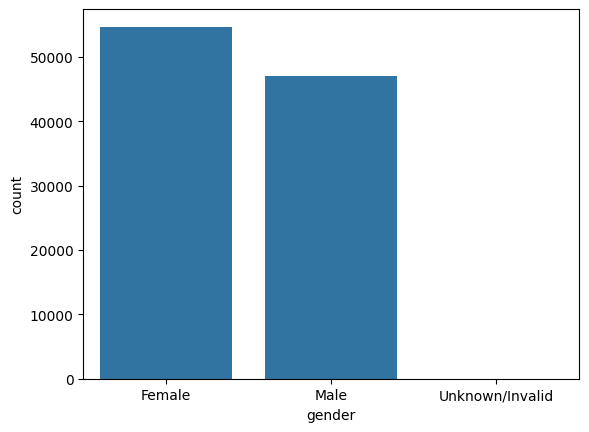

In [19]:
# Show the gender distribution
sns.countplot(data=diabetes_dataset, x='gender')

<Axes: xlabel='time_in_hospital', ylabel='Count'>

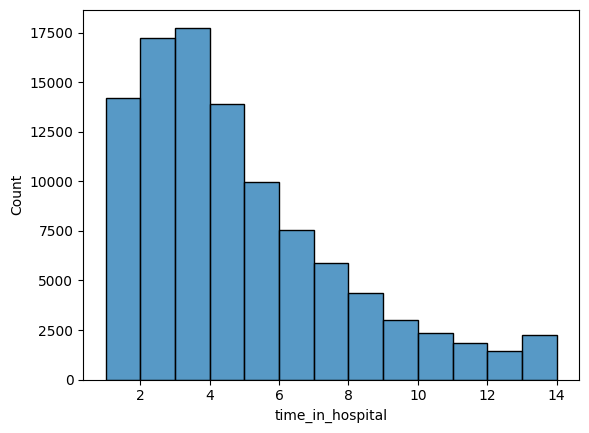

In [20]:
# Create a histogram to show the frequency of different lengths of stay in the hospital
sns.histplot(data=diabetes_dataset, x='time_in_hospital', binwidth=1)

<Axes: xlabel='num_lab_procedures'>

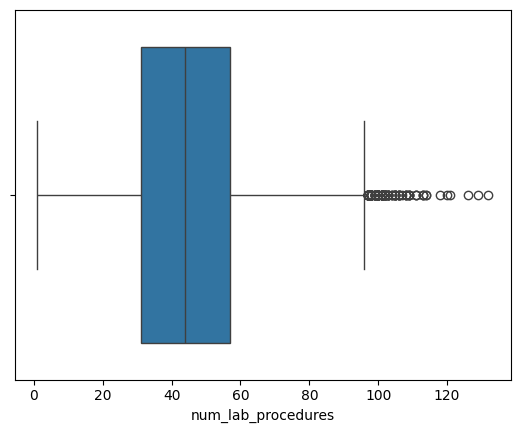

In [21]:
# Use a box plot to show the distribution of num_lab_procedures
sns.boxplot(data=diabetes_dataset, x='num_lab_procedures')

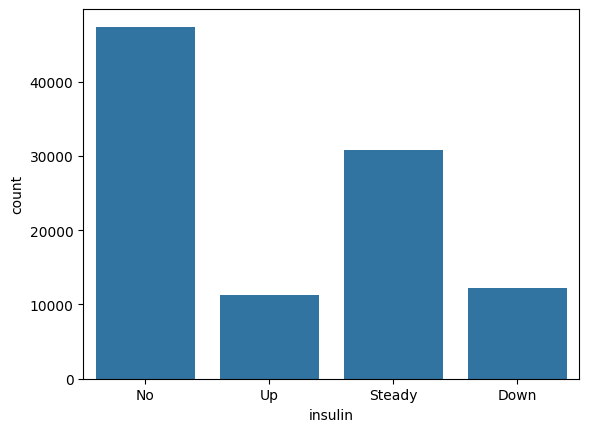

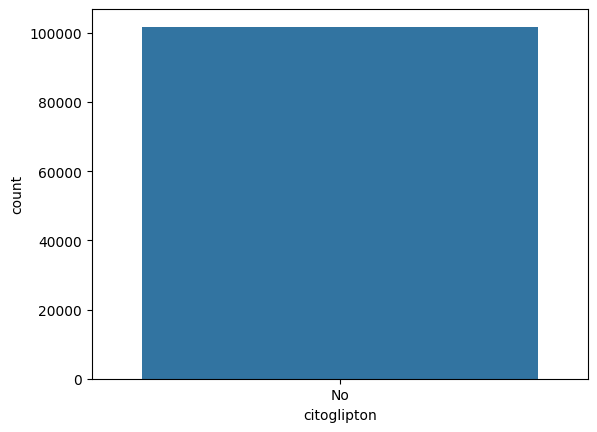

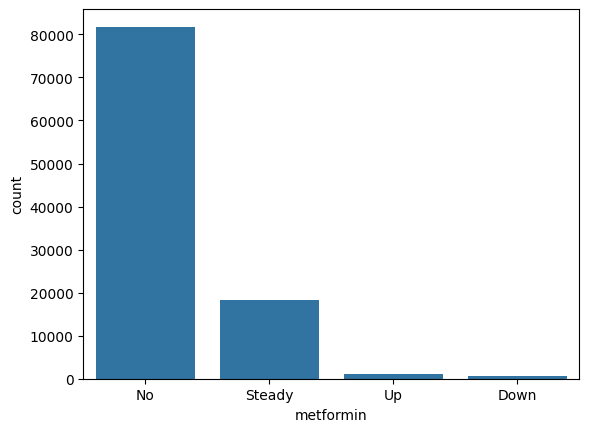

In [22]:
# Create a bar chart showing the counts of "Yes", "No", or "Steady" values for key medications like insulin, metformin, etc.
medications = ['insulin', 'citoglipton', 'metformin']
for med in medications:
    sns.countplot(data=diabetes_dataset, x=med)
    plt.show()

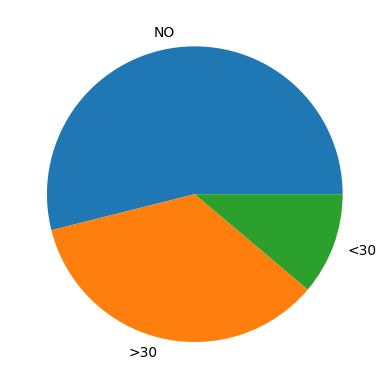

In [23]:
# Create a pie chart showing the proportions of patients readmitted within 30 days (<30), after 30 days (>30), or not at all (NO)
readmitted_counts = diabetes_dataset['readmitted'].value_counts()
plt.pie(x=readmitted_counts, labels=readmitted_counts.index)
plt.show()

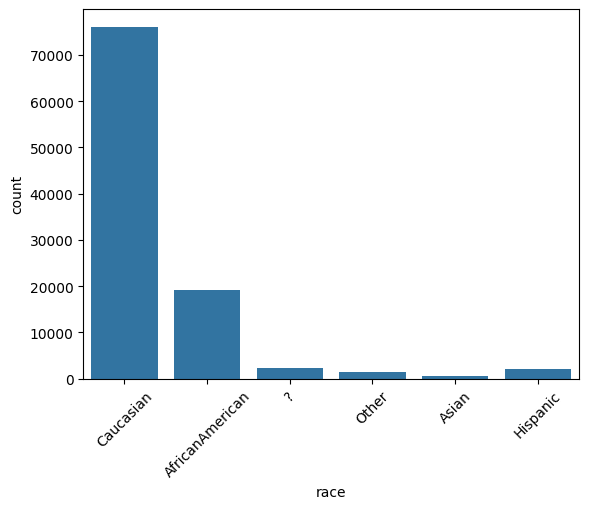

In [24]:
# Create a bar chart showing the count of patients by race
sns.countplot(data=diabetes_dataset, x='race')
plt.xticks(rotation=45)
plt.show()

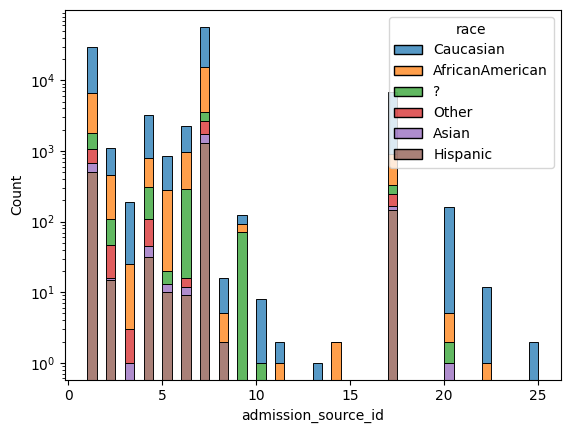

In [25]:
# Use a stacked bar chart to see which admission_source_id is common for each race
sns.histplot(data=diabetes_dataset, x='admission_source_id', hue='race', multiple='stack', binwidth=0.5)
plt.yscale('log')
plt.show()

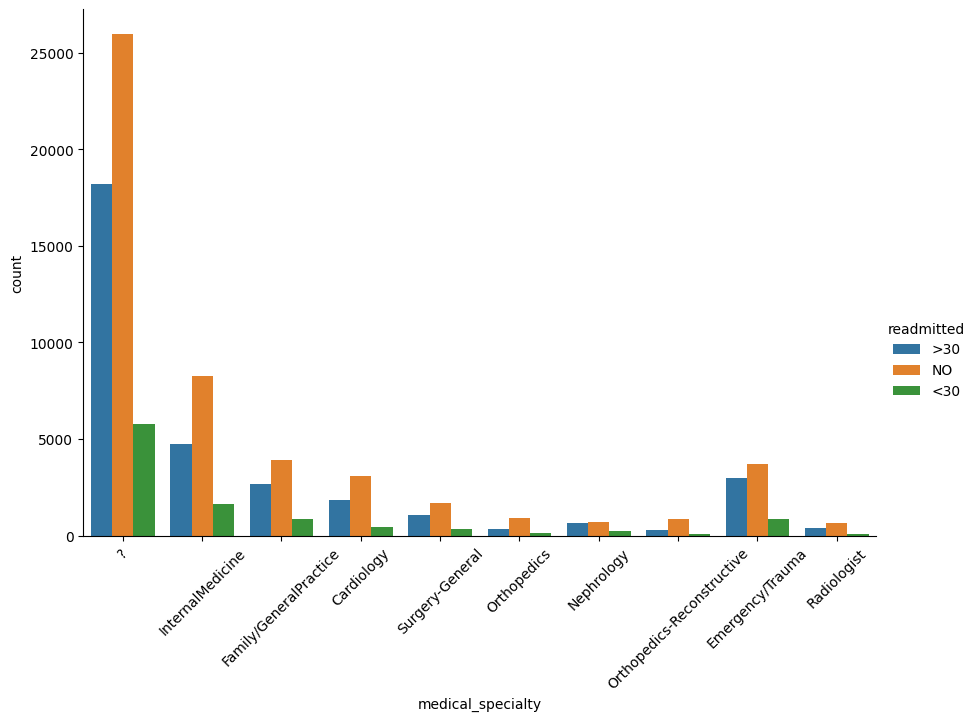

In [26]:
# Use a grouped bar chart to show readmitted status across specialties
top_10_specialties = diabetes_dataset['medical_specialty'].value_counts().nlargest(10).index
filtered_data = diabetes_dataset[diabetes_dataset['medical_specialty'].isin(top_10_specialties)]

sns.catplot(
    data=filtered_data, 
    x='medical_specialty',
    hue='readmitted', 
    kind='count',
    height=6, 
    aspect=1.5
)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='time_in_hospital', ylabel='count'>

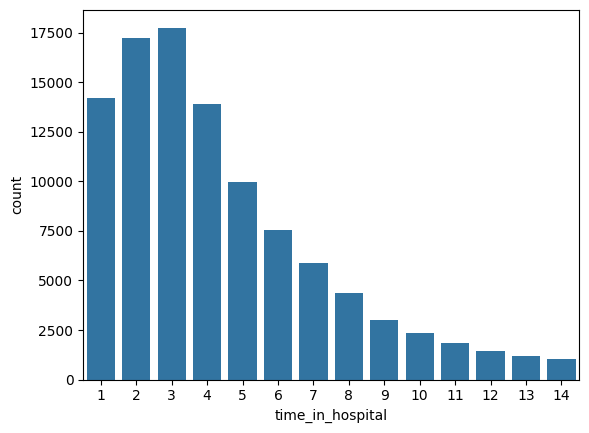

In [27]:
# Visualise distribution of a numeric column
sns.countplot(data=diabetes_dataset, x='time_in_hospital')

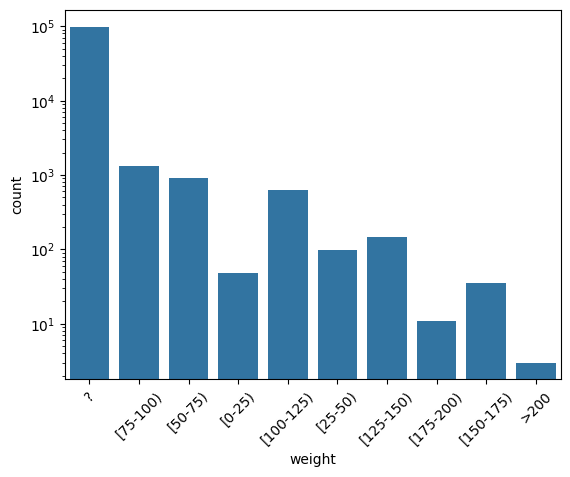

In [28]:
# Perform count plot of a categorical variable
sns.countplot(data=diabetes_dataset, x='weight')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

### 1B.5 Identify Metadata from the Dataset

In [29]:
import csv

def split_csv_into_tables(file_path):
    """
    Reads a specially formatted CSV file containing multiple tables separated by empty rows
    and returns a list of DataFrames for each table. The first column of each table
    is automatically set as the index.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        list: A list of DataFrames, one for each table in the file.
    """
    tables = []
    current_table = []
    
    with open(file_path, 'r') as file:
        reader = csv.reader(file)  # Use csv.reader to handle quoted values
        for row in reader:
            # Check if the row is empty, indicating a table separation
            if not row or all(cell.strip() == "" for cell in row):
                if current_table:  # Process the completed table
                    # Extract headers and data for the current table
                    header = current_table[0]
                    data = current_table[1:]
                    # Create a DataFrame
                    df = pd.DataFrame(data, columns=header)
                    # Set the first column as the index
                    df.set_index(header[0], inplace=True)
                    # Append the DataFrame to the list
                    tables.append(df)
                    current_table = []  # Reset for the next table
            else:
                current_table.append(row)
    
    # Add the last table if it wasn't followed by an empty line
    if current_table:
        header = current_table[0]
        data = current_table[1:]
        df = pd.DataFrame(data, columns=header)
        df.set_index(header[0], inplace=True)
        tables.append(df)
    
    return tables

In [ ]:
# Load metadata
tables = split_csv_into_tables('./Data/IDS_mapping.csv')

# Access individual tables
admission_type = tables[0]
discharge_disposition = tables[1]
admission_source = tables[2]

# Print table names and preview content
admission_source

,description
admission_source_id,
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)
6,Transfer from another health care facility
7,Emergency Room
8,Court/Law Enforcement
9,Not Available


_________
## *Task 2: Data Processing
### Task Description
Create a robust data preprocessing pipeline to handle missing values, encode categorical variables, and scale numerical features.

### Task 2.1: Dataset and Features Inspection

#### 2.1.1: Load and Check for Incorrect Types


In [ ]:
# Loading the data
diabetic_data = pd.read_csv('./Data/diabetic_data.csv')

In [32]:
# Visualise the first few rows of the data
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [33]:
# Display information about the dta
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [34]:
# Generate statistics
diabetic_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [35]:
# Show all the feature names
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Task 2.2: Preprocessing the Dataset


#### 2.2.1: Identify Missing Values
- Missing values can significantly impact model performance and analysis.

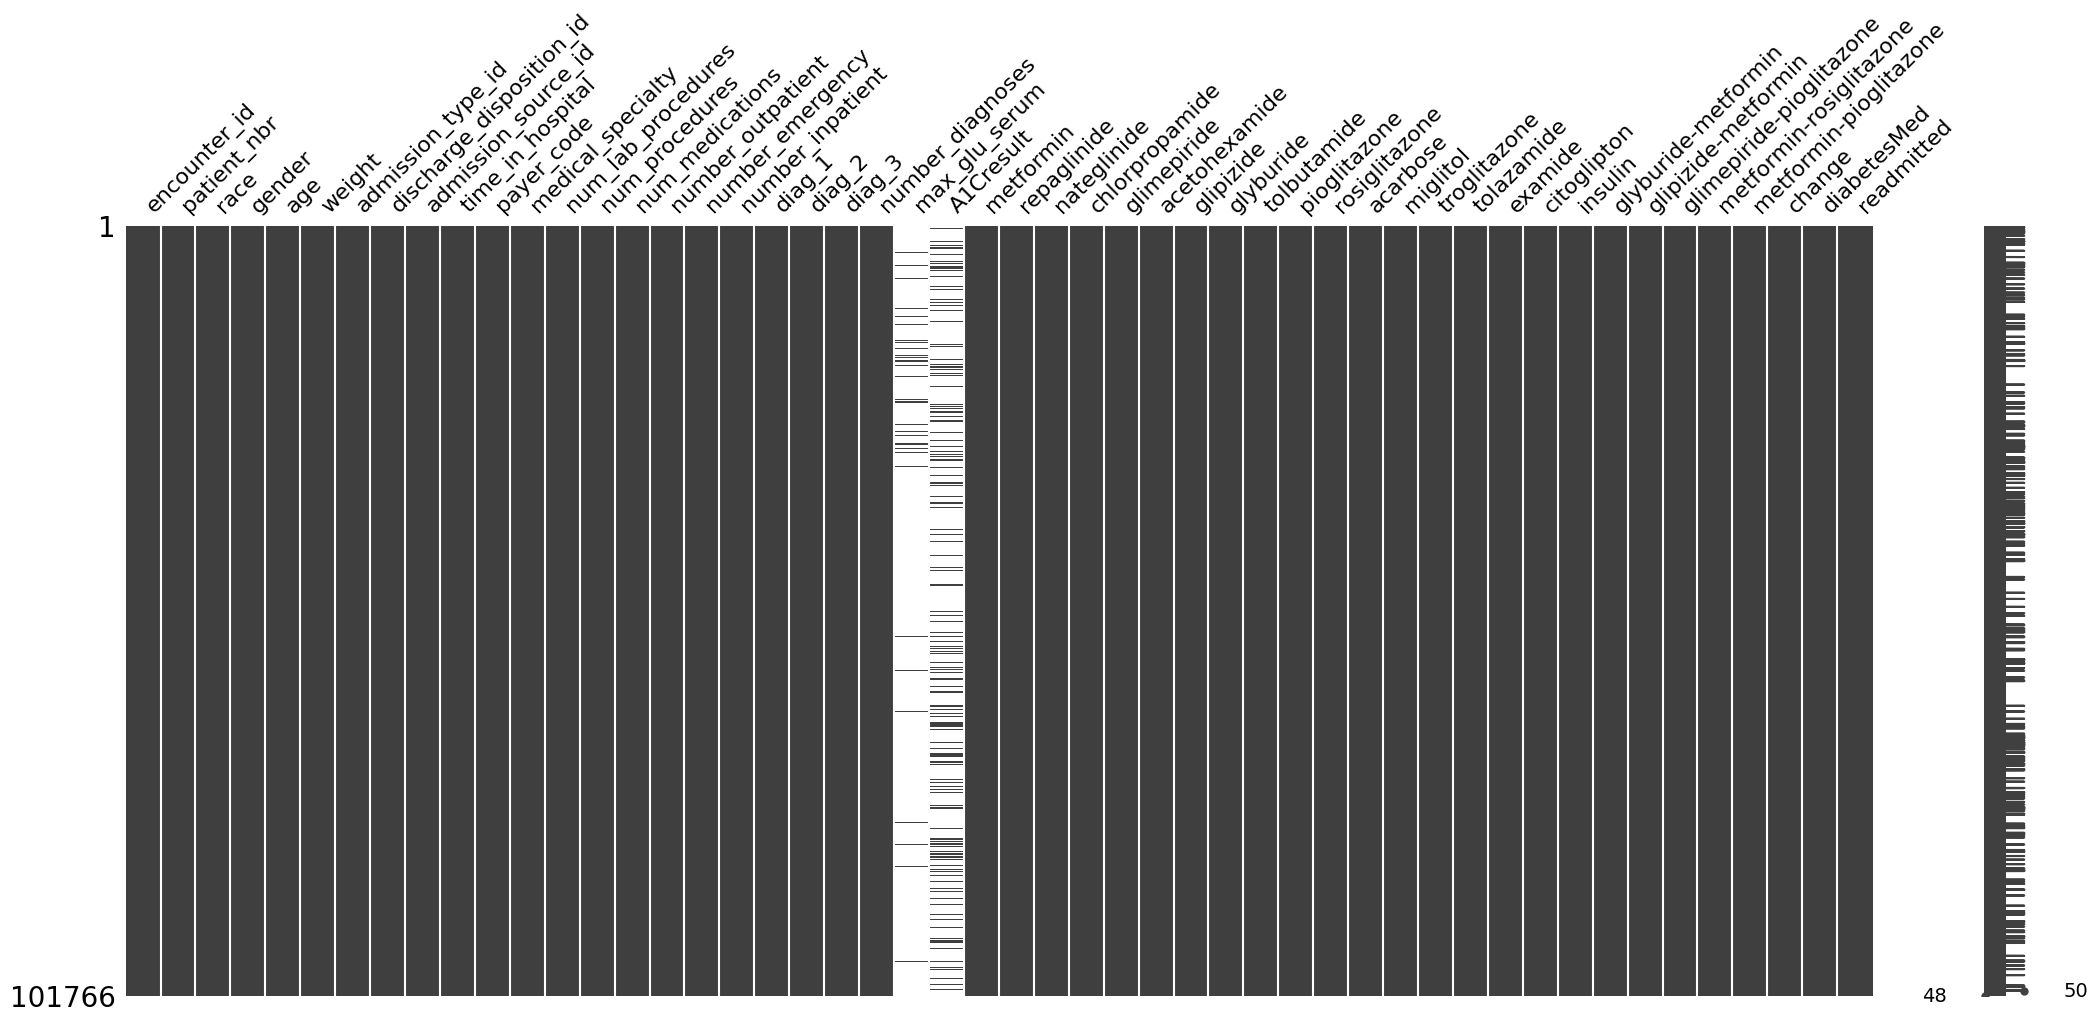

In [36]:
# Visualize missing data
import missingno as msno
msno.matrix(diabetic_data)
plt.show()

In [37]:
# Generalize missing values to np.nan
diabetic_data.replace(to_replace=['?', 'Unkown/Invalid', 'Other'], value=np.nan, inplace=True)

In [38]:
# Drop if rows with null values representing less than 5%
rows_to_drop = diabetic_data.columns[diabetic_data.isna().sum() <= (len(diabetic_data) * 0.05)]
diabetic_data.dropna(subset=rows_to_drop, inplace=True)

In [39]:
# Remove columns with excessive missing values (>50%)
threshold = 0.5
missing_stats = diabetic_data.isnull().mean()
cols_to_drop = missing_stats[missing_stats > threshold].index
diabetic_data.drop(columns=cols_to_drop, inplace=True)

In [40]:
# Fill missing numerical values with median
num_cols = diabetic_data.select_dtypes(include=['float64', 'int64']).columns
diabetic_data[num_cols] = diabetic_data[num_cols].fillna(diabetic_data[num_cols].median())

In [41]:
# Fill missing categorical values with mode
cat_cols = diabetic_data.select_dtypes(include=['object']).columns
diabetic_data[cat_cols] = diabetic_data[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))


#### 2.2.2: Handle Irrelevant or Redundant Data

In [42]:
# Drop columns
diabetic_data.drop(['patient_nbr', 'medical_specialty', 'payer_code'], axis=1, inplace=True)


#### 2.2.3: Standardize, Transform, and Encode Data
- Replace categorical values with standardized categoies.
- Encode binary categorical features.
- One-hot encode categorical

In [43]:
# Replace values to have only 'No' and 'Yes'
diabetic_data.replace(to_replace=['Steady', 'Up', 'Down'], value='Yes', inplace=True)

In [44]:
# Replace readmitted values to have 0 or 1
diabetic_data['readmitted'].replace({'NO':0,'>30':1,'<30':1}, inplace=True)

C:\Users\Erik\AppData\Local\Temp\ipykernel_11984\33211945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetic_data['readmitted'].replace({'NO':0,'>30':1,'<30':1}, inplace=True)
C:\Users\Erik\AppData\Local\Temp\ipykernel_11984\33211945.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diab

In [45]:
# Remove non-numeric characters from diagnosis columns and convert to float64 type
diag_cols = ['diag_1', 'diag_2', 'diag_3']

for col in diag_cols:
    diabetic_data[col] = diabetic_data[col].str.replace(r'[a-zA-Z]', '', regex=True).astype('float64')

In [46]:
# Map age column to numeric values
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

diabetic_data['age'] = diabetic_data['age'].map(age_mapping)

In [47]:
# Encode medicines and other binary features:
from sklearn.preprocessing import OrdinalEncoder

medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

enc = OrdinalEncoder(categories = [['No', 'Yes']])

for column in medicines:
    diabetic_data[column] = enc.fit_transform(diabetic_data[[column]])

diabetic_data['diabetesMed'] = enc.fit_transform(diabetic_data[['diabetesMed']])

enc = OrdinalEncoder(categories = [['No', 'Ch']])
diabetic_data['change'] = enc.fit_transform(diabetic_data[['change']])

In [48]:
# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder

diabetic_data = pd.get_dummies(diabetic_data)


#### 2.2.4: Handle Outliers

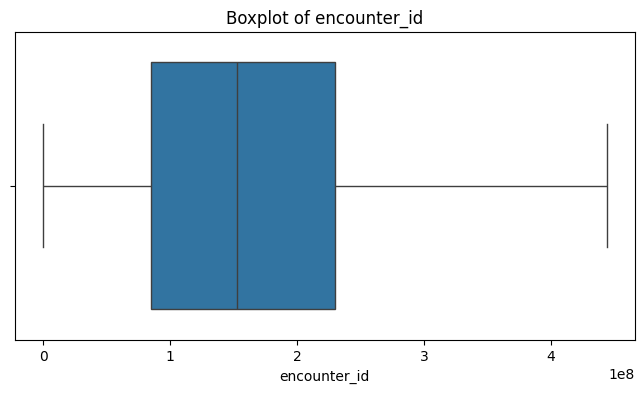

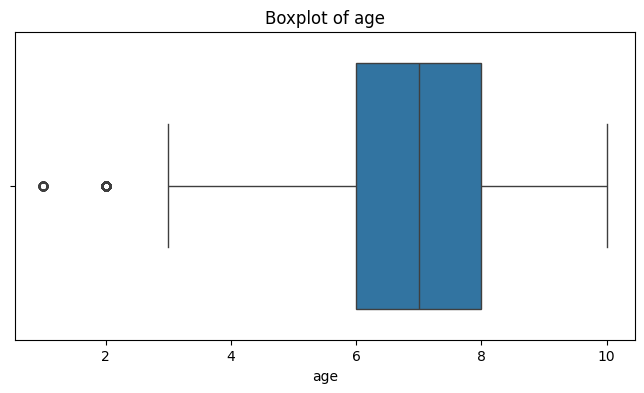

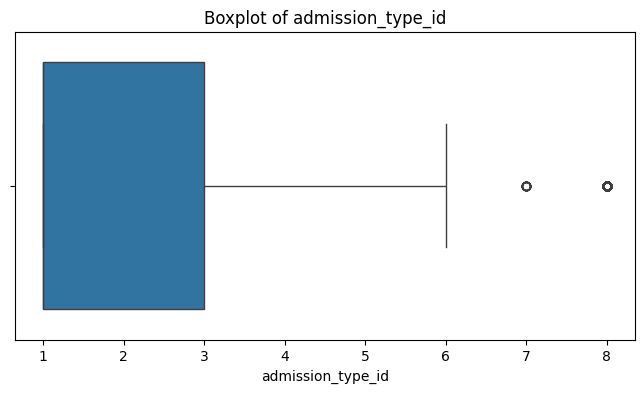

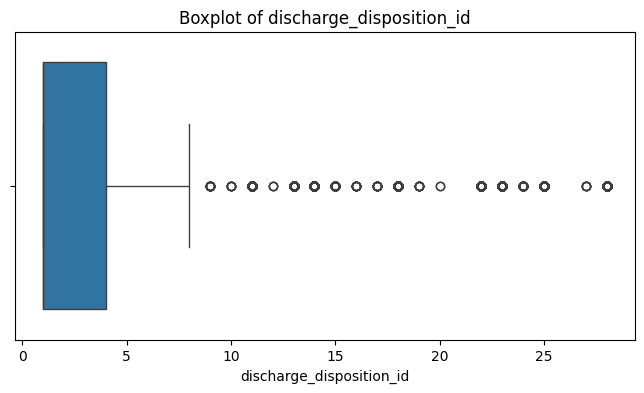

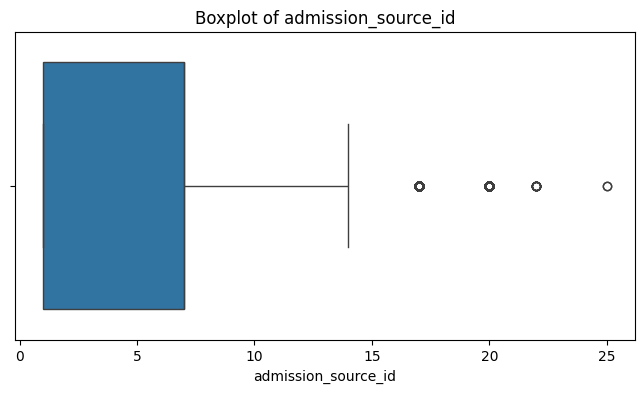

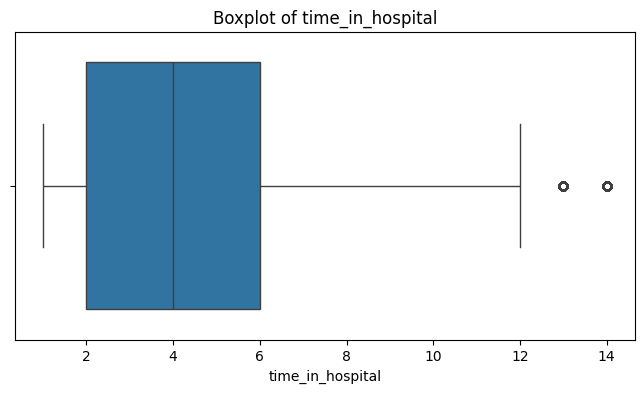

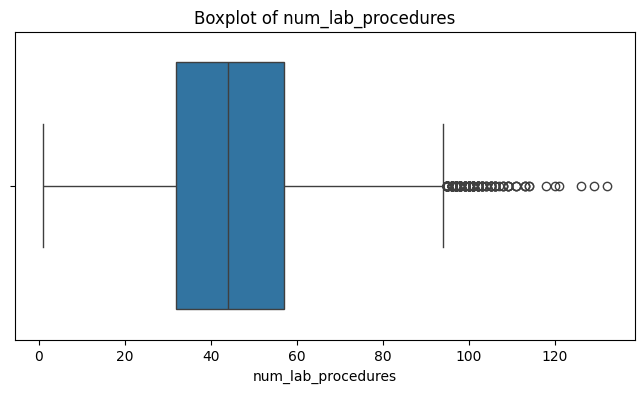

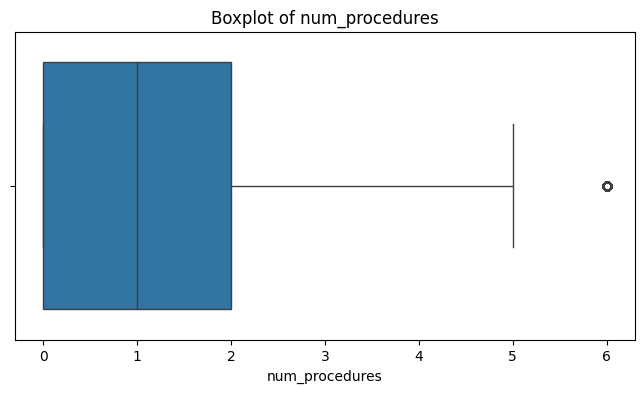

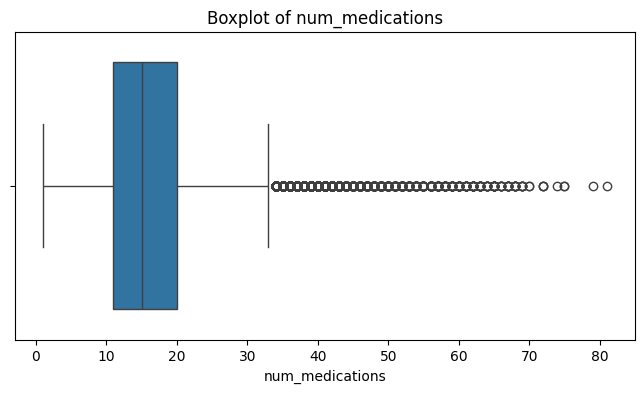

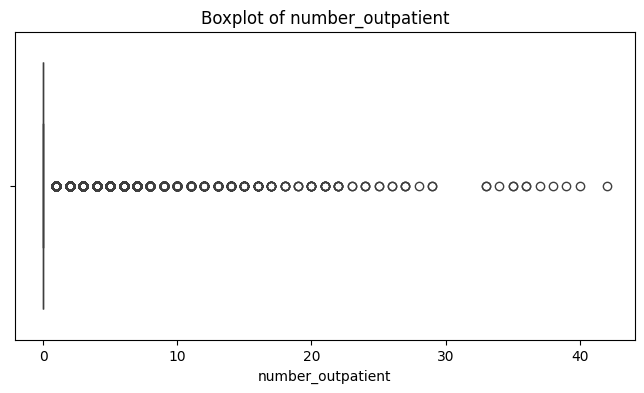

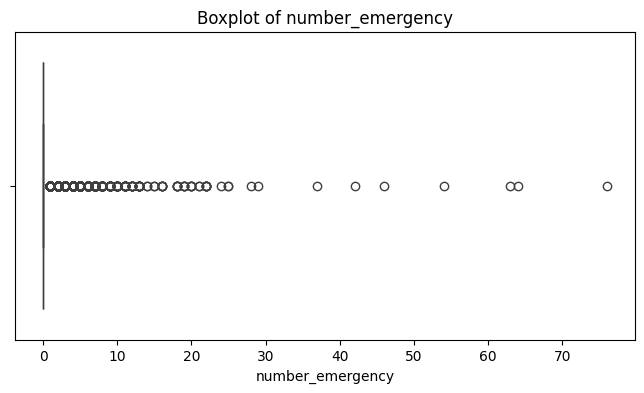

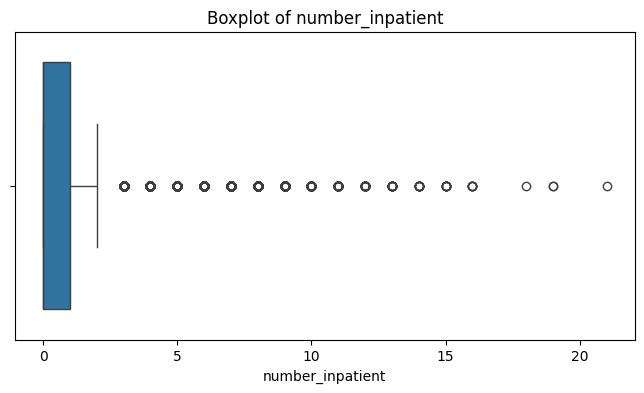

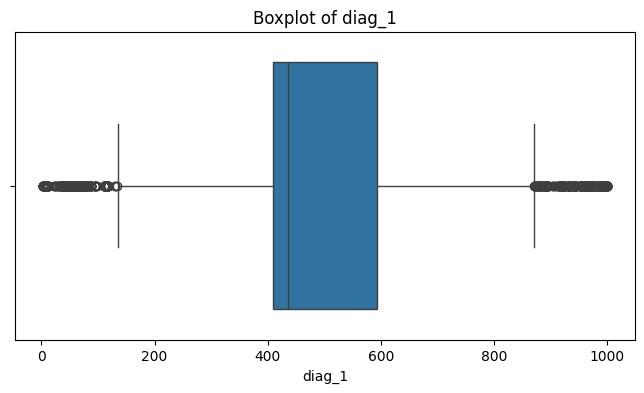

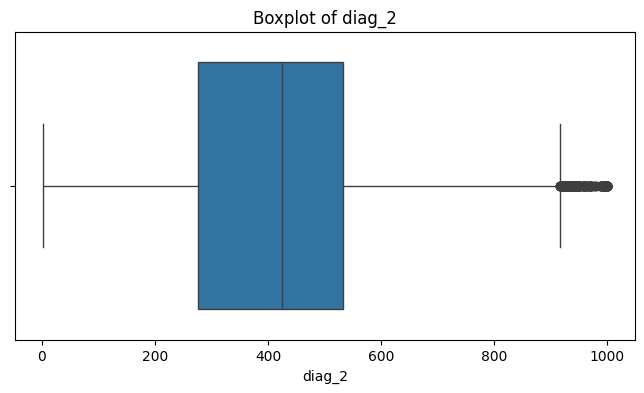

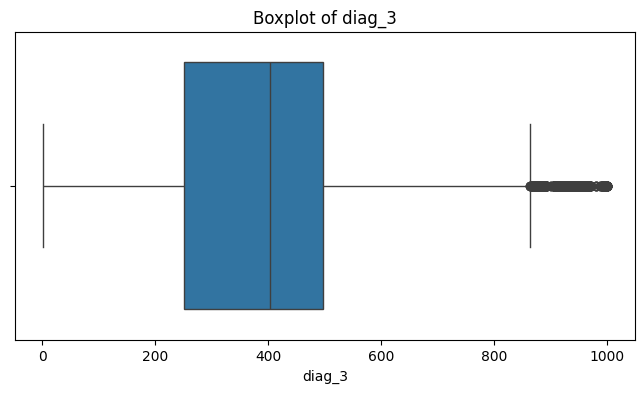

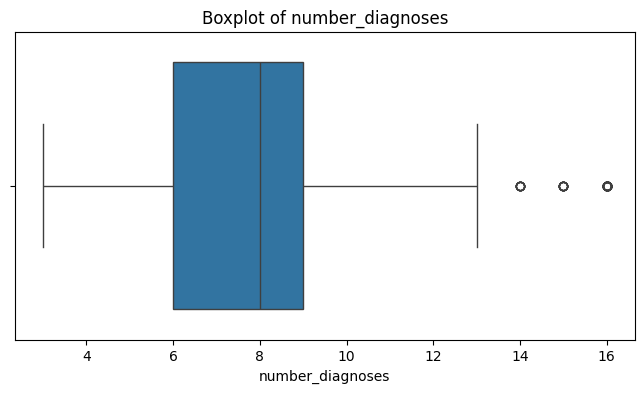

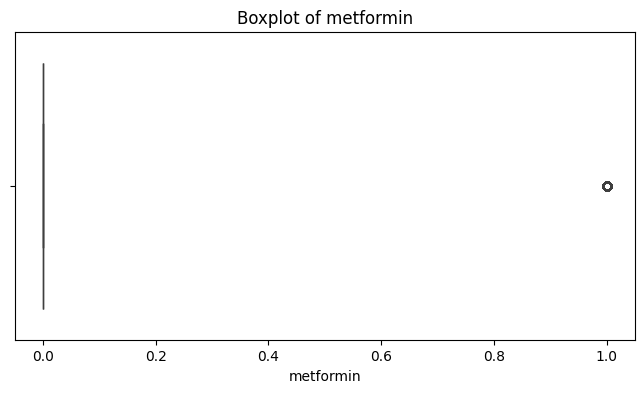

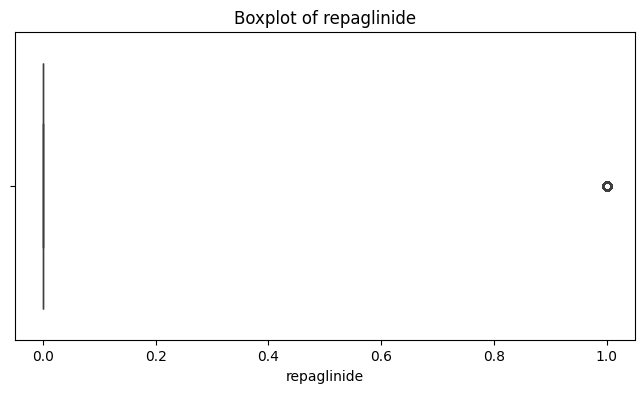

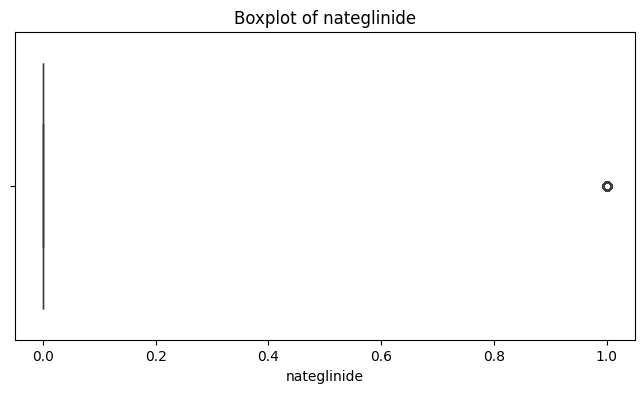

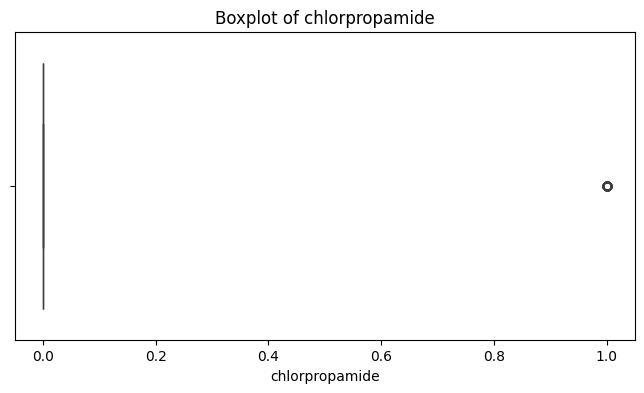

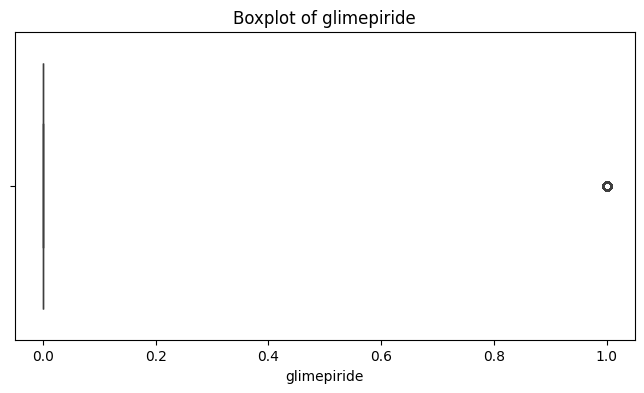

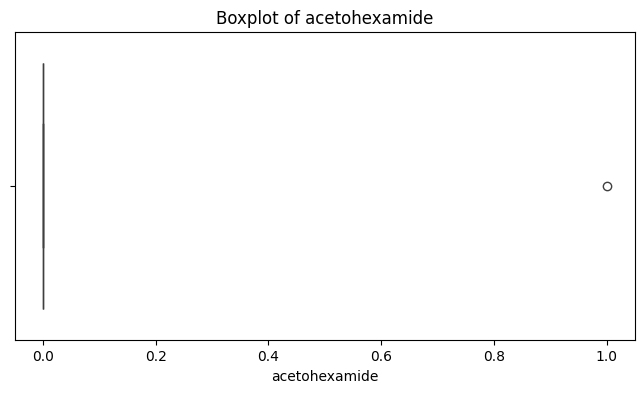

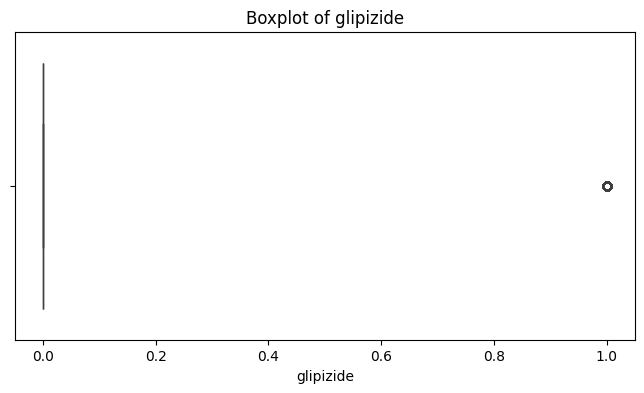

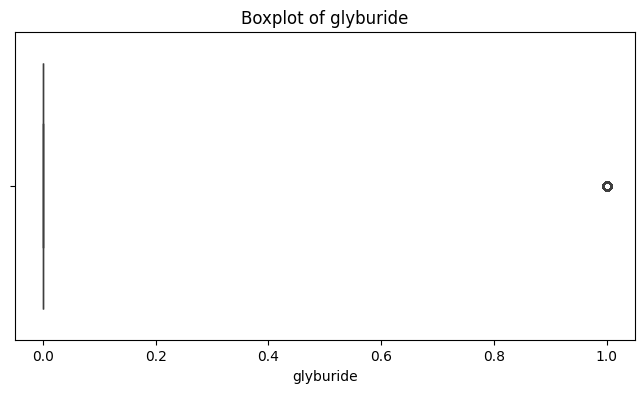

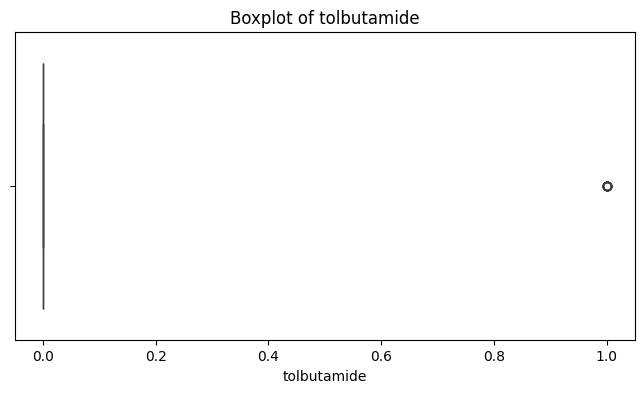

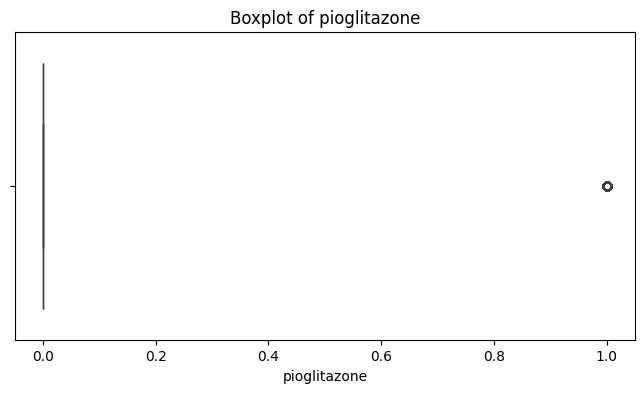

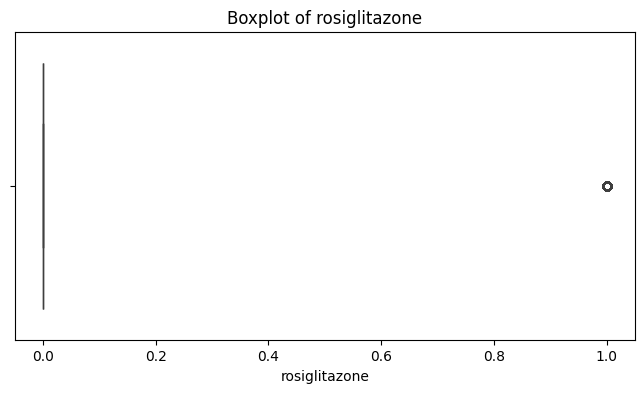

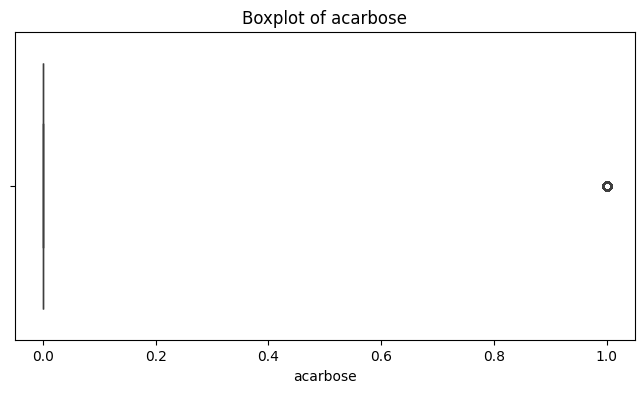

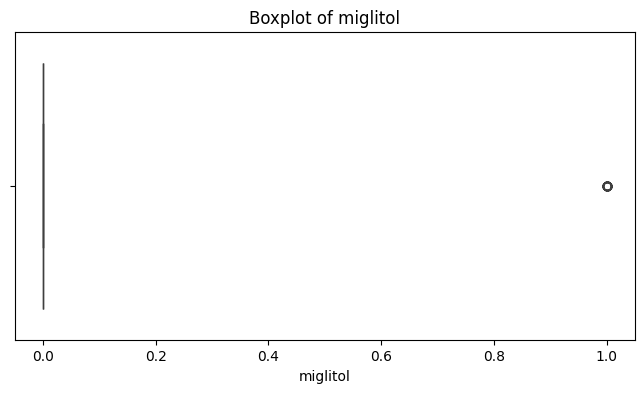

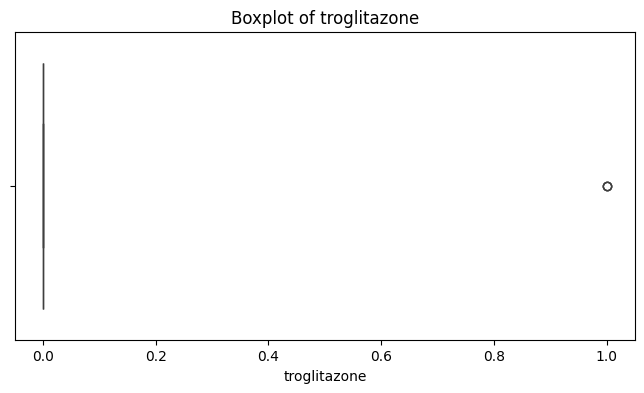

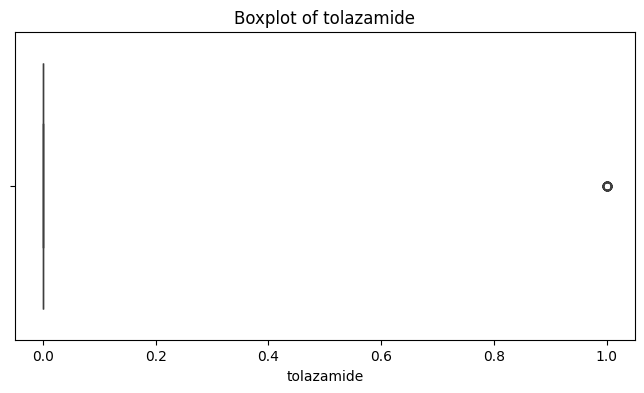

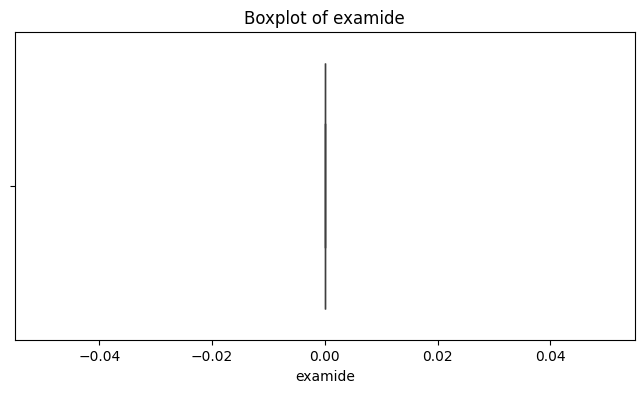

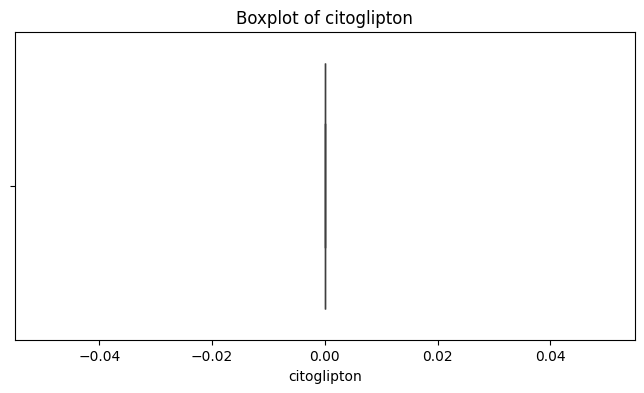

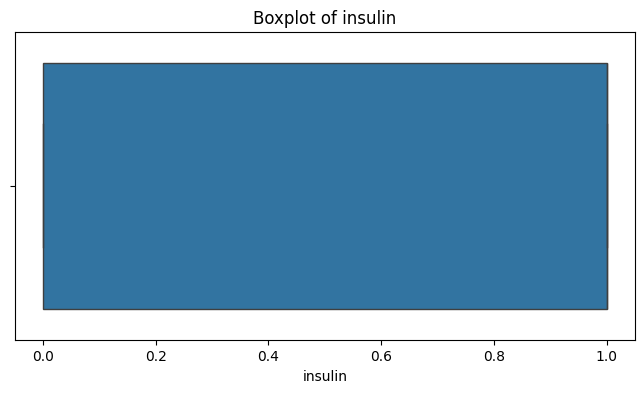

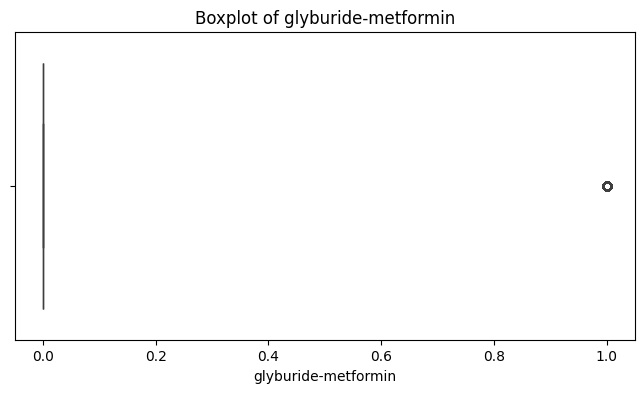

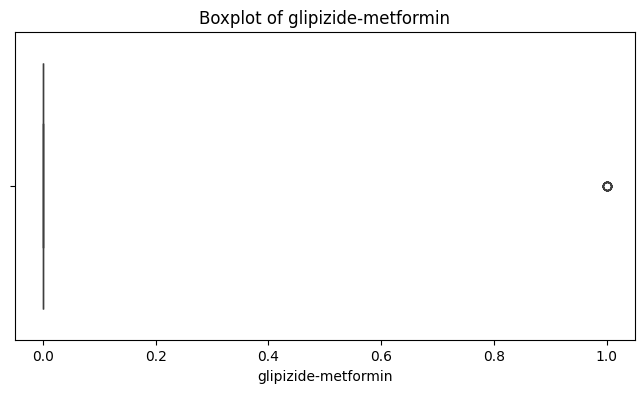

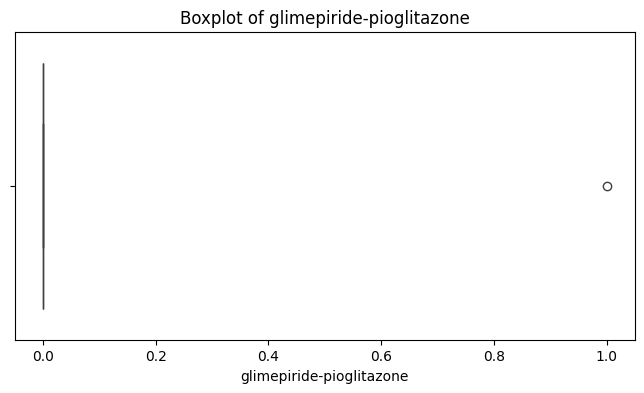

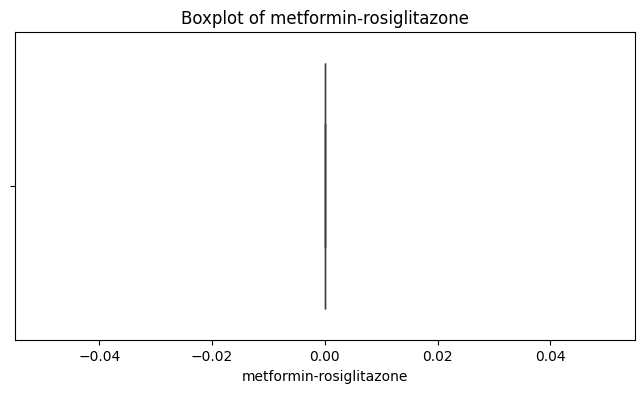

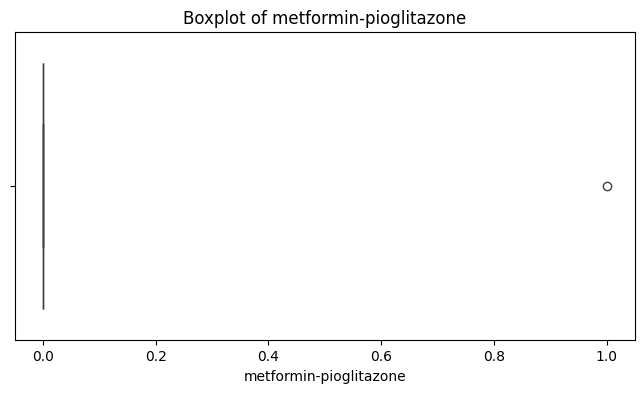

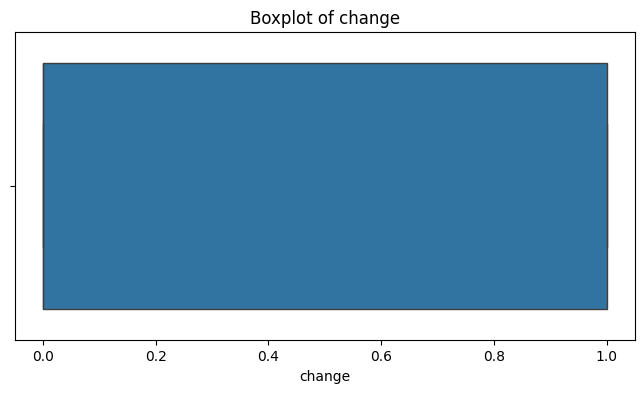

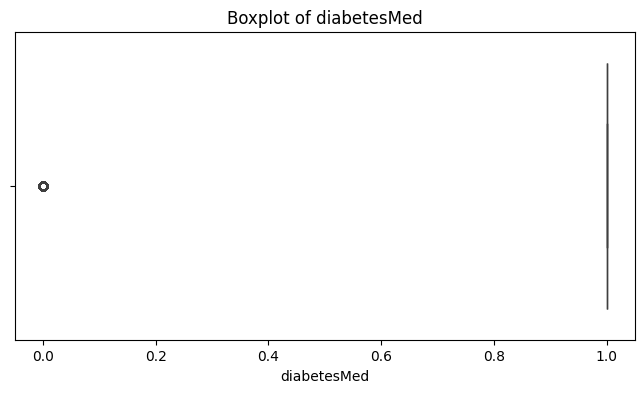

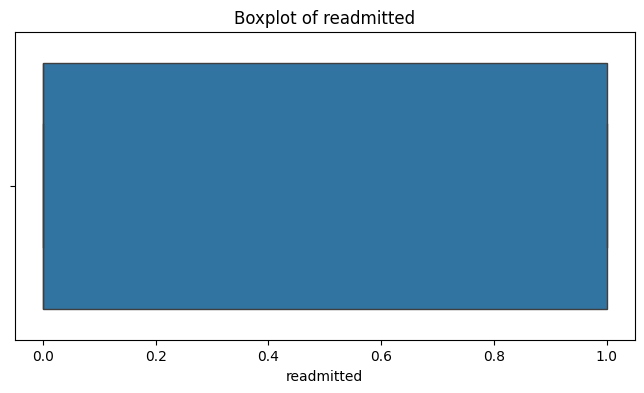

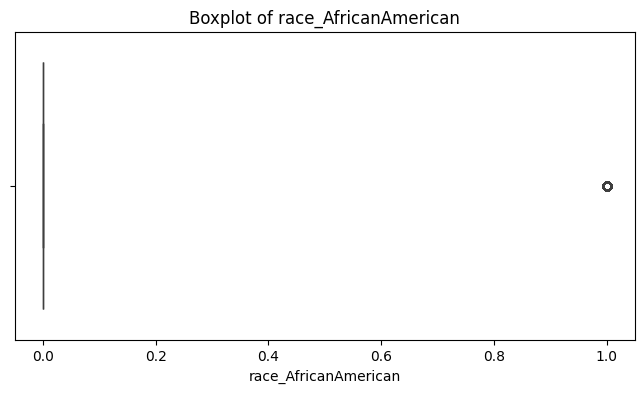

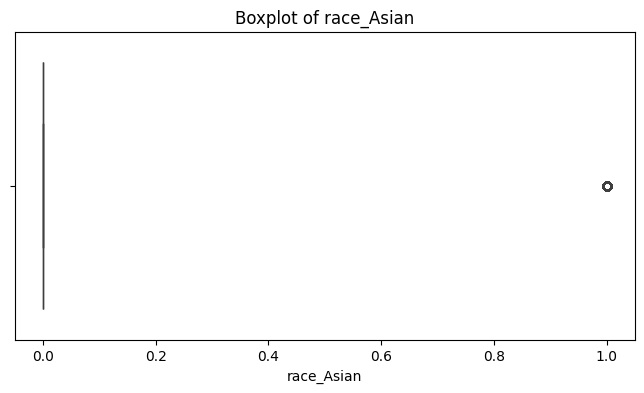

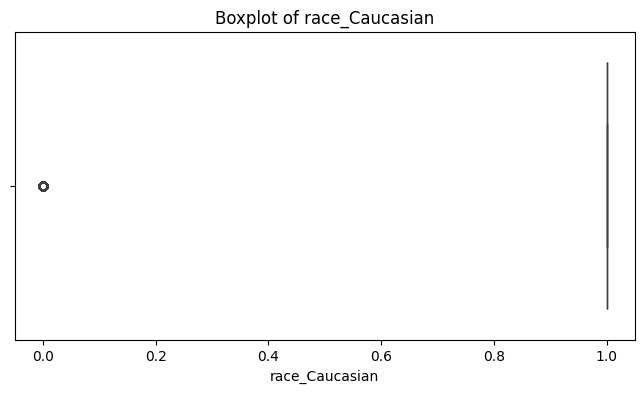

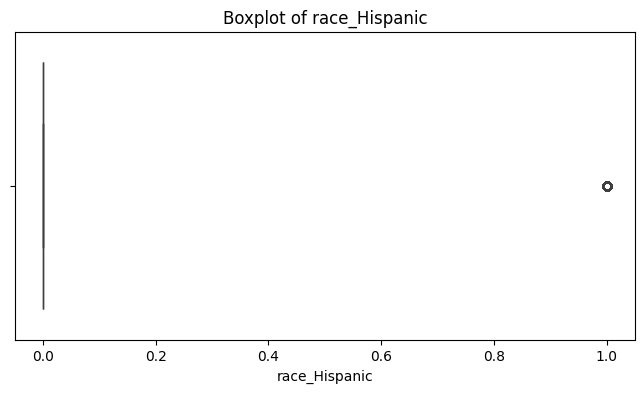

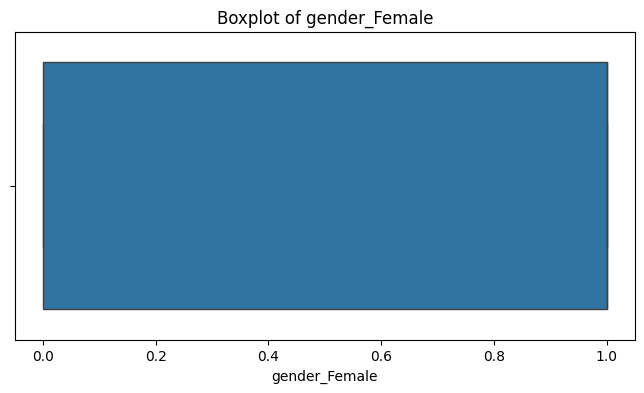

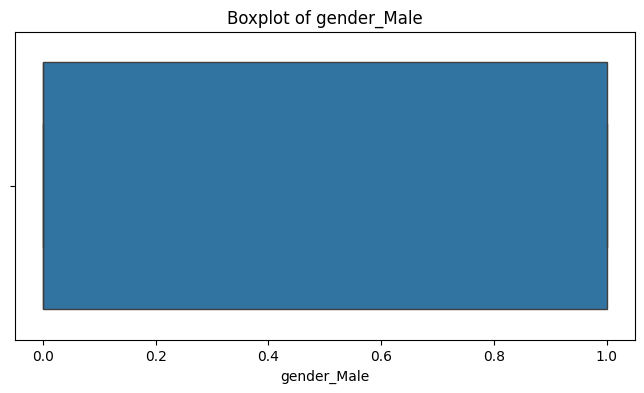

In [49]:
# Detect outliers
for column in diabetic_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=diabetic_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [50]:
# Handle outliers by capping top and bottom 15%
from scipy.stats.mstats import winsorize
for column in diabetic_data.columns:
    diabetic_data[column] = winsorize(diabetic_data[column], limits=[0.15, 0.15]) 


#### 2.2.5: Feature Selection

In [51]:
# Analyze correlation matrix
corr_matrix = diabetic_data.corr()
filtered_corr = corr_matrix.where(((corr_matrix > 0.25) | (corr_matrix < -0.25)) & (corr_matrix != 1.00))

<Figure size 1200x2000 with 0 Axes>

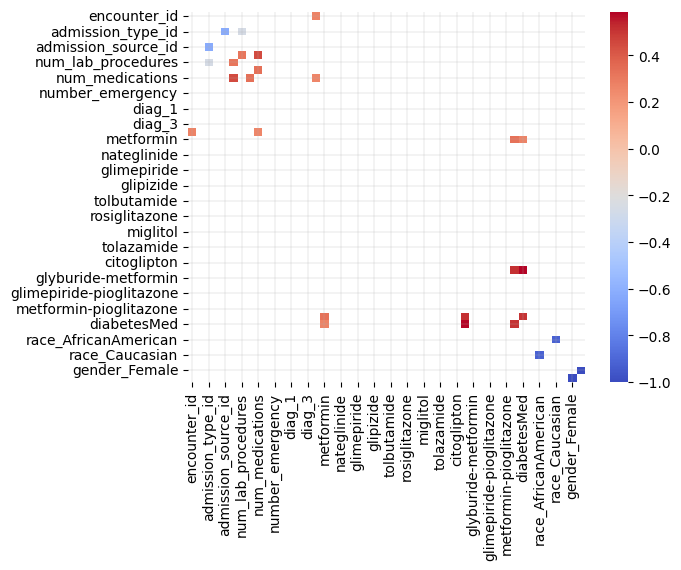

<Figure size 1200x2000 with 0 Axes>

In [52]:
# Visualize correlations
sns.heatmap(data=filtered_corr, cmap='coolwarm')
plt.grid(True, linewidth=0.2)
plt.figure(figsize=(12,20))

___________
## *Task 3: Machine Learning
### Task Description
Implement various machine learning algorithms for regression, classification and clustering and evaluating them.

### **Task 3.1: Implementing a Regression Model**
#### 3.1.1: Split the data
- Define target.
- Split data for training and testing.

In [53]:
# Split data
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
target = 'time_in_hospital'
X = diabetic_data.drop(columns=[target])
y = diabetic_data[target]

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.1.2: Implement a linear regression model

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialising and training Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mae_reg = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse_reg = mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f"Linear Regression MAE: {mae_reg}")
print(f"Linear Regression MSE: {mse_reg}")

Linear Regression MAE: 1.4607926267407148
Linear Regression MSE: 3.209475964405387


#### 3.1.3: Visualise the output for linear regression

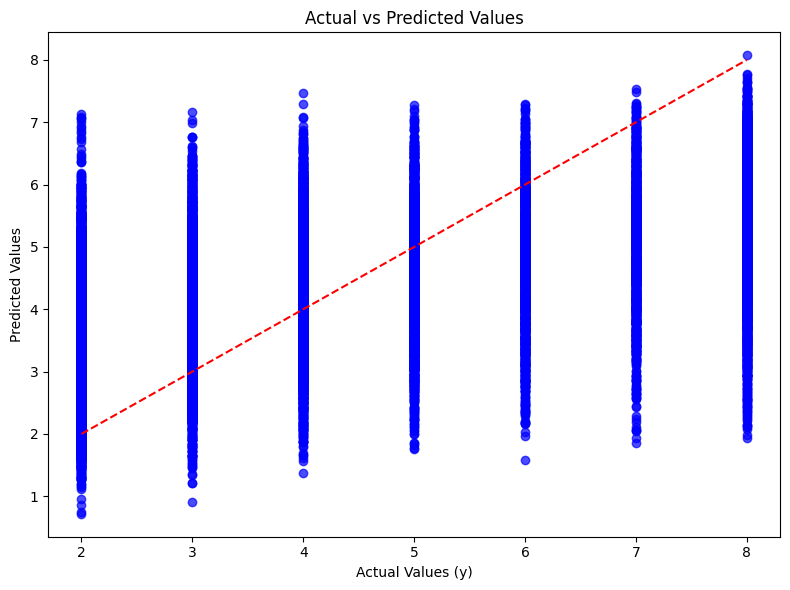

In [55]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

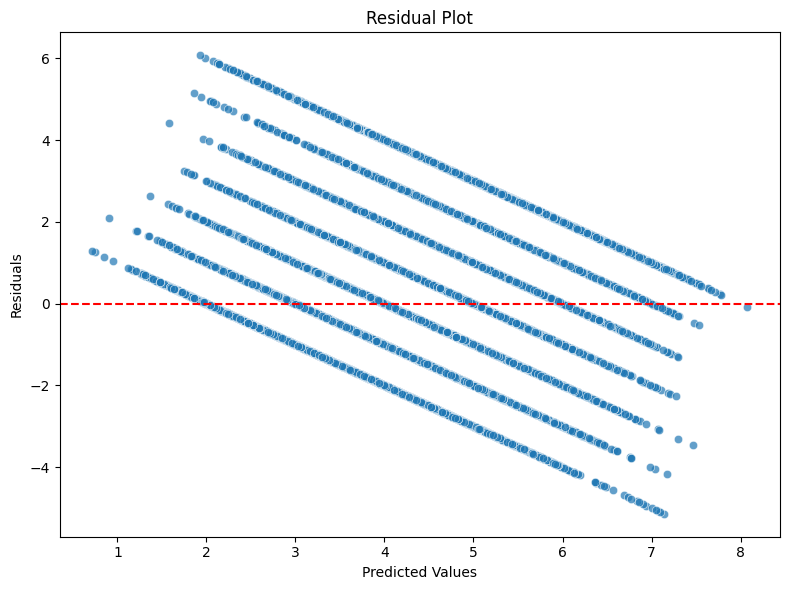

In [56]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Zero error line
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

#### 3.1.4: Implement Decision Tree Regression for Non-linear Relationships

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialising and training Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)  
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
mae_tree = mean_absolute_error(y_true=y_test, y_pred=y_pred_tree)
mse_tree = mean_squared_error(y_true=y_test, y_pred=y_pred_tree)


print(f"Decision Tree Regression MAE: {mae_tree}")
print(f"Decision Tree Regression MSE: {mse_tree}")

Decision Tree Regression MAE: 1.6859273066169618
Decision Tree Regression MSE: 5.529667598633116


#### 3.1.5: Implement Gradient Boosting Regression

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialising and training Gradient Boosting Regressor
gboost_model = GradientBoostingRegressor(random_state=42)
gboost_model.fit(X_train, y_train)

# Predictions
y_pred_gboost = gboost_model.predict(X_test)

# Evaluation
mae_gboost = mean_absolute_error(y_true=y_test, y_pred=y_pred_gboost)
mse_gboost = mean_squared_error(y_true=y_test, y_pred=y_pred_gboost)

print(f"Gradient Boosting Regression MAE: {mae_gboost}")
print(f"Gradient Boosting Regression MSE: {mse_gboost}")

Gradient Boosting Regression MAE: 1.3488147057724473
Gradient Boosting Regression MSE: 2.817531678534279


#### 3.1.6: Implement XGBoost Regression

In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train XGBoost Regressor
xgboost_model = XGBRegressor(random_state=42, verbosity=0)
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluation
mae_xgboost = mean_absolute_error(y_true=y_test, y_pred=y_pred_xgboost)
mse_xgboost = mean_squared_error(y_true=y_test, y_pred=y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost}")
print(f"XGBoost Regression MSE: {mse_xgboost}")

XGBoost Regression MAE: 1.2733595152751522
XGBoost Regression MSE: 2.6407909417407187


#### 3.1.7: Visualise the output for non-linear regression

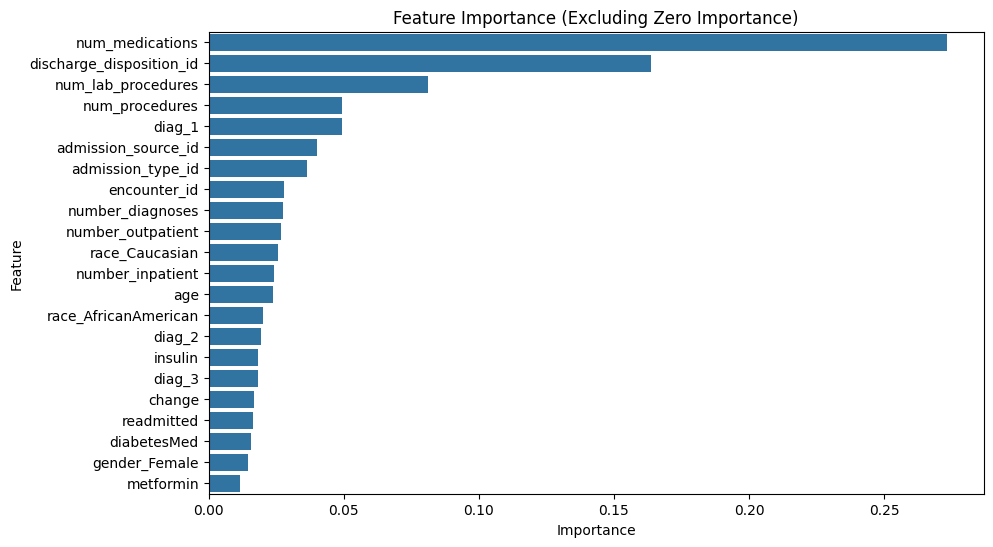

In [60]:
# Feature importance for XGBoost
importance = xgboost_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Exclude features with zero importance
importance_df = importance_df[importance_df['Importance'] > 0]

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Excluding Zero Importance)')
plt.show()

#### 3.1.8: Evaluation and Model Comparison
Compare the performance of all four models: Linear Regression, Decision Tree Regression, Gradient Boosting, and XGBoost. Summarise each model’s performance using a comparison table.


In [61]:
# Sample comparison table
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [mae_reg, mae_tree, mae_gboost, mae_xgboost],
    "MSE": [mse_reg, mse_tree, mse_gboost, mse_xgboost]
}

pd.DataFrame(results)

,Model,MAE,MSE
0,Linear Regression,1.460793,3.209476
1,Decision Tree,1.685927,5.529668
2,Gradient Boosting,1.348815,2.817532
3,XGBoost,1.273360,2.640791


++++++++
### **3.2: Implementing Classification Baseline**


#### 3.2.1:  Prepare Data for Classification


In [62]:
# Defining features (X) and target (y)
target = 'readmitted'
X = diabetic_data.drop(columns=[target])
y = (diabetic_data[target] == 1)

In [63]:
# Spliting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2.2:  Implement Logistic Regression Model

In [64]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_reg = scaler.transform(X)

# Spliting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y, test_size=0.2, random_state=42)

In [65]:
# Initialising and training Logistic Regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train_reg, y_train_reg)

LogisticRegression(class_weight='balanced')

In [66]:
# Predictions
y_pred = logistic_model.predict(X_test_reg)
y_pred_probs = logistic_model.predict_proba(X_test_reg)[:, 1]

In [67]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lg_accuracy = accuracy_score(y_test_reg, y_pred)
lg_precision = precision_score(y_test_reg, y_pred)
lg_recall = recall_score(y_test_reg, y_pred)
lg_f1 = f1_score(y_test_reg, y_pred)

print(f"Accuracy: {lg_accuracy}")
print(f"Precision Score: {lg_precision}")
print(f"Recall Score: {lg_recall}")
print(f"F1 Score: {lg_f1}")

Accuracy: 0.6177384280832556
Precision Score: 0.5952520860265601
Recall Score: 0.5625277654375833
F1 Score: 0.5784274538913949


In [68]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_reg, y_pred)

array([[6866, 3444],
       [3939, 5065]])

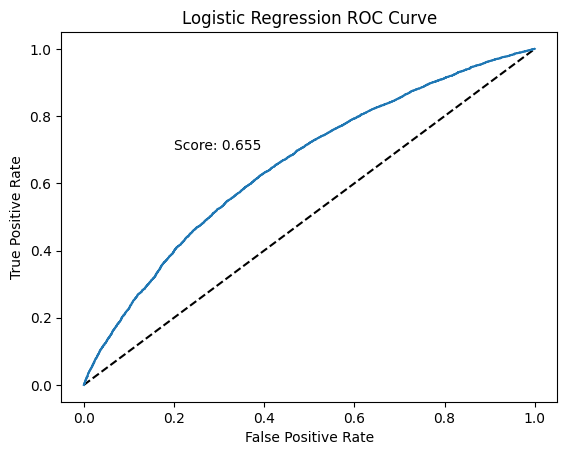

In [69]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_reg, y_pred_probs)
roc_auc = roc_auc_score(y_test_reg, y_pred_probs).round(3) # ROC AUC score
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.annotate('Score: ' + str(roc_auc), [0.2, 0.7])
plt.show()

#### 3.2.3: Implement Random Forest Classifier as a Non-linear Baseline

In [70]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [71]:
# Predictions
y_pred = rfc.predict(X_test)

In [72]:
# Evaluation
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_recall = recall_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {rfc_accuracy}")
print(f"Precision Score: {rfc_precision}")
print(f"Recall Score: {rfc_recall}")
print(f"F1 Score: {rfc_f1}")

Accuracy: 0.6238997618307963
Precision Score: 0.614323258869908
Recall Score: 0.519213682807641
F1 Score: 0.5627783796797882


In [73]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7375, 2935],
       [4329, 4675]])

#### 3.2.4: Implement K-Nearest Neighbors (KNN) Classifier

In [74]:
# importing requires sklearn packages
from sklearn.neighbors import KNeighborsClassifier

# Initialising and training the KNN model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

In [75]:
# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {knn_accuracy}")
print(f"Precision Score: {knn_precision}")
print(f"Recall Score: {knn_recall}")
print(f"F1 Score: {knn_f1}")

Accuracy: 0.5367091229160195
Precision Score: 0.5034474267421817
Recall Score: 0.4541314971123945
F1 Score: 0.4775195609015532


In [76]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6277, 4033],
       [4915, 4089]])

#### 3.2.5: Evaluation and Model Comparison
Compare the performance of implemented models using four metrics including "Accuracy", "Precision", "Recall", and "F1-score".

In [77]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy": [lg_accuracy, rfc_accuracy, knn_accuracy],
    "Precision": [lg_precision, rfc_precision, knn_precision],
    "Recall": [lg_recall, rfc_recall, knn_recall],
    "F1": [lg_f1, rfc_f1, knn_f1],
}

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.617738,0.595252,0.562528,0.578427
1,Random Forest,0.623900,0.614323,0.519214,0.562778
2,K-Nearest Neighbors,0.536709,0.503447,0.454131,0.477520


++++++++
### **Task 3.3: Implementing a Clustering Model**


#### 3.3.1: Load and Preprocess the Data

In [78]:
# Select only relevant columns
columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','readmitted', 'num_medications']
X = diabetic_data[columns]

In [79]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 3.3.2: Implement K-Means Clustering

In [80]:
# Create multiple instances of KMeans
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 11)]

In [81]:
# Calculate inertias for Elbow Method
inertias = [model.inertia_ for model in kmeans_per_k]

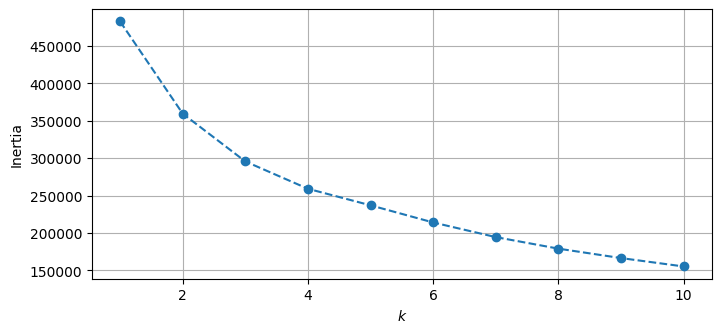

In [82]:
# Elbow Method
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [83]:
# Calculate various silhouette scores
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                      for model in kmeans_per_k[1:]]


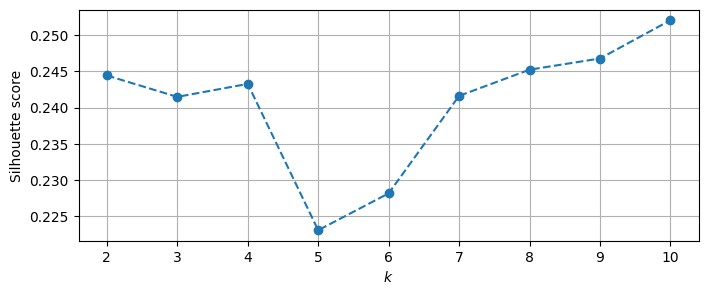

In [84]:
# Sillhouette Score
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

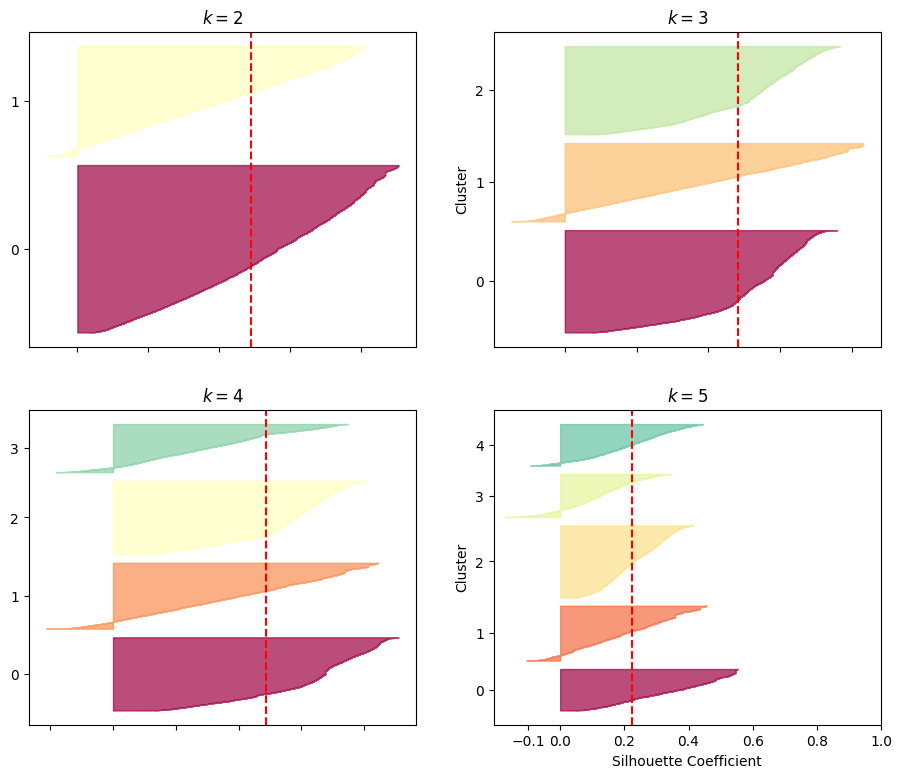

In [85]:
# Silhouette Analysis
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel('Cluster')
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
    plt.title(f'$k={k}$')

plt.show()

In [86]:
# Choose k
optimal_k = 3

In [87]:
# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [88]:
# Evaluate KMeans clustering
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
diabetic_data['kmeans_cluster'] = labels
sil_score_kmeans = silhouette_score(X_scaled, labels)
print(f"KMeans Silhouette Score: {sil_score_kmeans}")

KMeans Silhouette Score: 0.24146777585702534


#### 3.3.3: Apply PCA for Dimensionality Reduction

In [89]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

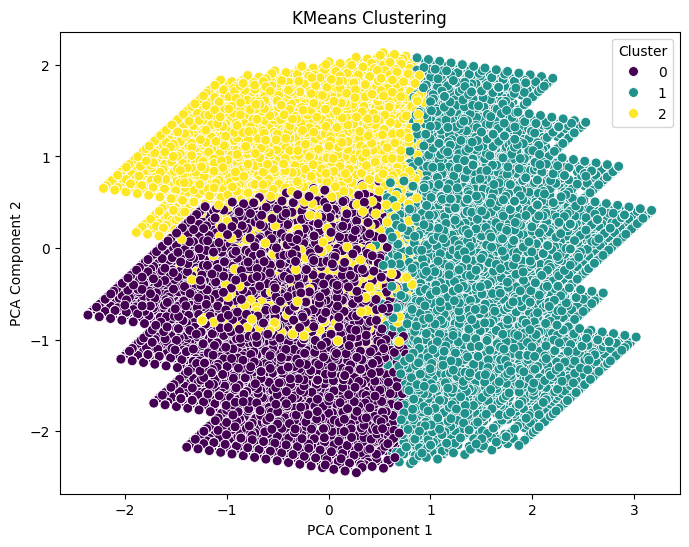

In [90]:
# Plot KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=diabetic_data['kmeans_cluster'],
    palette='viridis', s=50
)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### 3.3.4: Implement Random Hierarchical Clustering

In [91]:
# Perform Random Hierarchical Clustering in chunks
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def hierarchical_clustering_in_chunks(scaled_data, chunk_size=1000, method='complete', metric='euclidean'):
    n_samples = scaled_data.shape[0]
    chunk_indices = np.arange(0, n_samples, chunk_size)
    cluster_centroids = []
    all_labels = np.zeros(n_samples, dtype=int)  # To store final cluster labels
    
    # Process data in chunks
    for i, start_idx in enumerate(chunk_indices):
        end_idx = min(start_idx + chunk_size, n_samples)
        chunk = scaled_data[start_idx:end_idx]
        
        # Perform clustering on the chunk
        if chunk.shape[0] > 1:  # Ensure chunk has more than 1 sample
            linkage_data = linkage(chunk, method=method, metric=metric)
            dendrogram(linkage_data, no_plot=True)  # No need to plot interim dendrogram
            # Approximate centroids by averaging cluster data
            labels = AgglomerativeClustering(n_clusters=min(5, chunk.shape[0]), linkage=method).fit(chunk).labels_
            centroids = np.array([chunk[labels == c].mean(axis=0) for c in np.unique(labels)])
            cluster_centroids.append(centroids)
    
    # Combine centroids from all chunks
    cluster_centroids = np.vstack(cluster_centroids)
    
    # Perform hierarchical clustering on the combined centroids
    final_linkage_data = linkage(cluster_centroids, method=method, metric=metric)
    
    # Assign final cluster labels for all data points
    final_labels = fcluster(final_linkage_data, t=5, criterion='maxclust')
    
    # Map data points to their final clusters
    for i, start_idx in enumerate(chunk_indices):
        end_idx = min(start_idx + chunk_size, n_samples)
        chunk = scaled_data[start_idx:end_idx]
        if chunk.shape[0] > 1:
            # Assign data points in each chunk to their nearest centroid
            distances = np.linalg.norm(chunk[:, None] - cluster_centroids[final_labels - 1], axis=2)
            all_labels[start_idx:end_idx] = np.argmin(distances, axis=1) + 1
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_data, all_labels, metric=metric)
    
    # Plot the final dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(final_linkage_data)
    plt.title('Dendrogram (Processed in Chunks)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    return silhouette

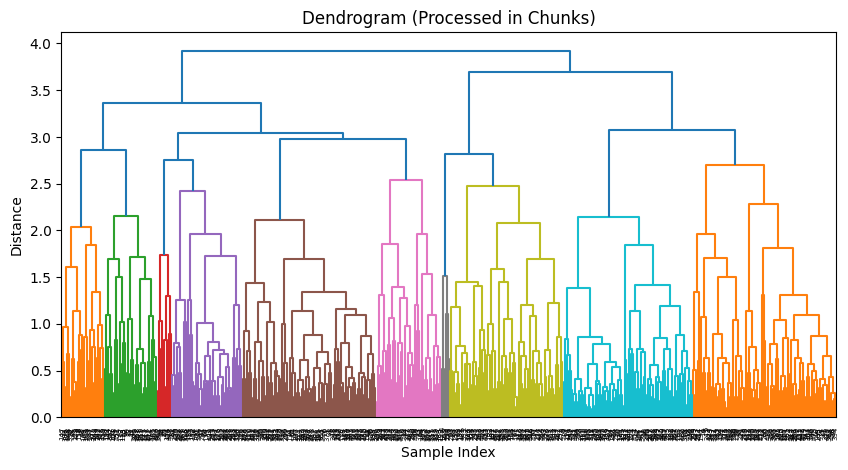

In [92]:
# Call function ans show dendrogram
sil_score_rand = hierarchical_clustering_in_chunks(X_scaled)

In [93]:
# Evaluate Random hierarchical clustering
sil_score_rand

np.float64(0.20596195951472068)

#### 3.3.5: Implement DBSCAN for Density-Based Clustering

In [94]:
# Implement DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
diabetic_data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

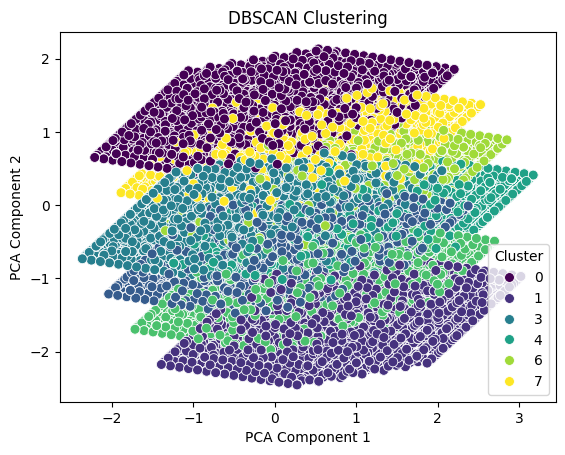

In [95]:
# Plot DBSCAN clusters
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=diabetic_data['dbscan_cluster'],
    palette='viridis', s=50
)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [96]:
# Evaluate DBSCAN clustering
sil_score_dbscan = silhouette_score(X_scaled, diabetic_data['dbscan_cluster'])
print(f"DBSCAN Silhouette Score: {sil_score_dbscan}")

DBSCAN Silhouette Score: 0.0906166304577285


#### 3.3.6: Evaluation and Model Comparison

In [97]:
# Summary of Silhouette Scores
results = {
    'Clustering Method': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [sil_score_kmeans, sil_score_rand, sil_score_dbscan]
}


pd.DataFrame(results)

,Clustering Method,Silhouette Score
0,K-Means,0.241468
1,Hierarchical,0.205962
2,DBSCAN,0.090617


++++++++++
### **3.4 Feature Engineering and Feature Selection**
Select the most relevant features to improve implemented models performance

#### 3.4.1: Feature Engineering

In [98]:
# Admission Type ID
diabetic_data['admission_type_id'].replace(to_replace=[5, 6, 8], value=np.nan, inplace=True)

C:\Users\Erik\AppData\Local\Temp\ipykernel_11984\1033501903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetic_data['admission_type_id'].replace(to_replace=[5, 6, 8], value=np.nan, inplace=True)


In [99]:
# Discharge Disposition ID
discharge_mapping = {
    1: 1,   # Home-Based Care
    6: 1,
    8: 1,
    2: 2,   # Short-Term or Acute Care Transfers
    9: 2,
    16: 2,
    17: 2,
    30: 2,
    3: 3,   # Nursing/Long-Term Care
    4: 3,
    5: 3,
    22: 3,
    23: 3,
    24: 3,
    13: 4,  # Hospice Care
    14: 4,
    19: 4,
    20: 4,
    21: 4,
    28: 5,  # Psychiatric Care
    10: 6,  # Specialized Facilities
    27: 6,
    29: 6,
    11: 7,  # Deceased
    7: 8,   # Administrative/Unknown
    12: 8,
    18: np.nan,  # Replace with NaN
    25: np.nan,  # Replace with NaN
    26: np.nan   # Replace with NaN
}

# Replace discharge_disposition_id with numerical groups and handle NaN
diabetic_data['discharge_disposition_id'] = diabetic_data['discharge_disposition_id'].replace(discharge_mapping)

In [100]:
# Admission Source ID
admission_source_mapping = {
    1: 1,  # Referral
    2: 1,
    3: 1,
    4: 2,  # Transfers
    5: 2,
    6: 2,
    10: 2,
    18: 2,
    19: 2,
    22: 2,
    25: 2,
    26: 2,
    7: 3,  # Emergency or Legal
    8: 3,
    11: 4,  # Births
    12: 4,
    13: 4,
    14: 4,
    23: 4,
    24: 4,
    9: np.nan,  # Administrative/Unknown
    15: np.nan,
    17: np.nan,
    20: np.nan,
    21: np.nan
}

# Replace admission_source_id with numerical groups and handle NaN
diabetic_data['admission_source_id'] = diabetic_data['admission_source_id'].replace(admission_source_mapping)

In [101]:
# Remove columns with only one value
useless = []
for col in diabetic_data.columns:
    if len(diabetic_data[col].unique()) == 1:
        useless.append(col)

diabetic_data.drop(labels=useless, axis=1, inplace=True)

#### 3.4.2: Generate Features
Generate new features that could improve model's performance.

In [ ]:
diag_data = pd.read_csv('./Data/diabetic_data.csv', usecols=['encounter_id', 'diag_1', 'diag_2', 'diag_3'])

# High-risk categories for diagnoses
high_risk_conditions = high_risk_conditions = {
    'Cardiovascular': [
        '4010', '4100', '4280',  # Hypertension, Myocardial Infarction, Heart Failure
        '4140', '4275',          # Coronary Atherosclerosis, Cardiac Arrhythmias
        '4292', '4293',          # Cardiomyopathy, Cardiomegaly
        '441', '4439',           # Aortic Aneurysm, Peripheral Arterial Disease
        '78551', '78552'         # Shock, Septic Shock
    ],
    'Diabetes Complications': [
        '2501', '2502', '2503',  # Diabetes with ketoacidosis, hyperosmolarity, or complications
        '2504', '2505', '2506',  # Diabetes with renal, eye, or neurological manifestations
        '2507', '2508', '2509'   # Diabetes with peripheral circulatory or other specified complications
    ],
    'Respiratory': [
        '496', 'J44', 'J45',     # COPD, Chronic Bronchitis, Asthma
        '491', '492',            # Emphysema, Chronic Bronchitis
        '51881', '51882',        # Acute Respiratory Distress Syndrome, Respiratory Failure
        '7862', '7865',          # Shortness of Breath, Cyanosis
        '5070', '5109'           # Aspiration Pneumonia, Other Pneumonia
    ],
    'Renal Disease': [
        '584', '585', '586', '599',  # Acute Kidney Failure, Chronic Kidney Disease, Renal Failure
        '403', '404',                # Hypertensive Kidney Disease
        '593', '5990', '5999'        # Hydronephrosis, Urinary Tract Infection, Other Urinary Disorders
    ],
    'Infectious Diseases': [
        '0030', '038',               # Salmonella Sepsis, Septicemia
        '482', '486',                # Bacterial Pneumonia, Pneumonia Unspecified
        '490', '49121',              # Bronchitis, Chronic Obstructive Bronchitis
        '99591', '99592'             # Sepsis, Severe Sepsis
    ],
    'Neurological Conditions': [
        '3310', '3320', '340',       # Alzheimer’s Disease, Parkinson’s Disease, Multiple Sclerosis
        '345', '430', '431',         # Epilepsy, Subarachnoid Hemorrhage, Intracerebral Hemorrhage
        '43491', '4359', '438'       # Stroke, Transient Ischemic Attack, Late Effects of Stroke
    ],
    'Cancers': [
        '140', '150', '162',         # Malignant Neoplasms of Oral Cavity, Esophagus, Lung
        '174', '182', '185',         # Breast Cancer, Uterine Cancer, Prostate Cancer
        '188', '189', '199'          # Bladder Cancer, Kidney Cancer, Other Malignant Neoplasms
    ],
    'Liver Disease': [
        '570', '571', '572',         # Acute Liver Failure, Chronic Liver Disease, Liver Abscess
        '5732', '5733', '5734'       # Hepatitis, Cirrhosis, Portal Hypertension
    ]
}

# Function to check if a diagnosis code is high-risk
def is_high_risk(code, high_risk_conditions):
    for category, codes in high_risk_conditions.items():
        if str(code) in codes:
            return True
    return False

# Apply the risk categorization to each diag column in diag_data
diag_data['diag_1_risk'] = diag_data['diag_1'].apply(lambda x: is_high_risk(x, high_risk_conditions))
diag_data['diag_2_risk'] = diag_data['diag_2'].apply(lambda x: is_high_risk(x, high_risk_conditions))
diag_data['diag_3_risk'] = diag_data['diag_3'].apply(lambda x: is_high_risk(x, high_risk_conditions))

# Combine the risk flags into a total risk score
diag_data['risk_score'] = diag_data[['diag_1_risk', 'diag_2_risk', 'diag_3_risk']].sum(axis=1)

# Merge the risk information from diag_data to diabetic_data on encounter_id
diabetic_data = diabetic_data.merge(diag_data[['encounter_id', 'risk_score']], on='encounter_id', how='left')


In [103]:
# Number of lab procedures and diagnostic tests
diabetic_data['lab_intensity'] = diabetic_data['num_lab_procedures'] + diabetic_data['num_procedures']

In [104]:
# Resource usage
diabetic_data['resource_intensity'] = diabetic_data['num_lab_procedures'] + diabetic_data['num_medications']

In [105]:
# Total number of visits by a patient
diabetic_data['total_visits'] = diabetic_data['number_outpatient'] + diabetic_data['number_inpatient']

#### 3.4.3: Feature Selection
Use feature importance from tree-based models (Random Forest, Gradient Boosting) to select important features


In [106]:
# Defining features (X) and target (y)
X = diabetic_data.drop(columns=['readmitted'])
y = (diabetic_data['readmitted'] == 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importances['Feature'].head(15).tolist()

['dbscan_cluster',
 'kmeans_cluster',
 'num_procedures',
 'time_in_hospital',
 'num_medications',
 'number_inpatient',
 'total_visits',
 'resource_intensity',
 'lab_intensity',
 'encounter_id',
 'num_lab_procedures',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses']

In [108]:
# Feature Ranking
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
X_train_selected = rfe.fit_transform(X_train, y_train)
rfe.get_feature_names_out()

array(['encounter_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'kmeans_cluster',
       'dbscan_cluster', 'lab_intensity', 'resource_intensity',
       'total_visits'], dtype=object)

<Figure size 1200x2000 with 0 Axes>

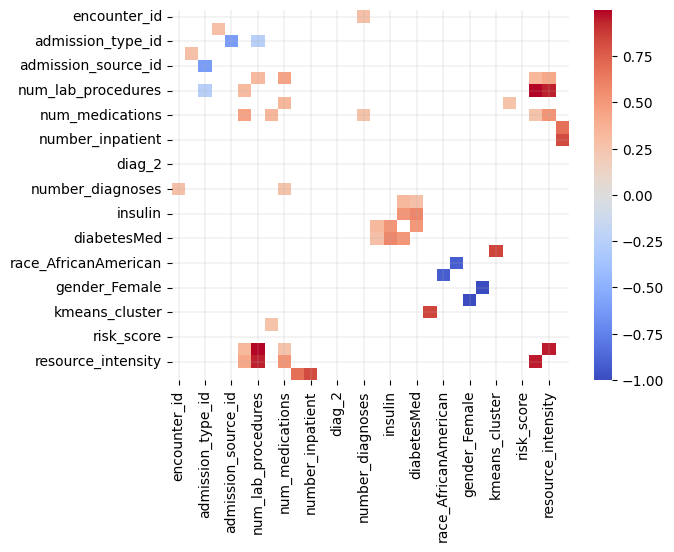

<Figure size 1200x2000 with 0 Axes>

In [109]:
# Correlation matrix
corr_matrix = diabetic_data.corr()
filtered_corr = corr_matrix.where(((corr_matrix > 0.25) | (corr_matrix < -0.25)) & (corr_matrix != 1.00))
sns.heatmap(data=filtered_corr, cmap='coolwarm')
plt.grid(True, linewidth=0.2)
plt.figure(figsize=(12,20))

#### 3.4.4: Model Evaluation After Feature Engineering
- After feature engineering and selection, evaluate your models again.

**XGBoost**

In [110]:
# Split data
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
target = 'time_in_hospital'
X = diabetic_data.drop(columns=[target])
y = diabetic_data[target]

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# XGBoost Regressor
xgboost_model = XGBRegressor(random_state=42, verbosity=0)
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluation
mae_xgboost_new = mean_absolute_error(y_true=y_test, y_pred=y_pred_xgboost)
mse_xgboost_new = mean_squared_error(y_true=y_test, y_pred=y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost_new}")
print(f"XGBoost Regression MSE: {mse_xgboost_new}")

XGBoost Regression MAE: 1.06207374047206
XGBoost Regression MSE: 1.8686381478436744


In [112]:
results = {
    'Version': ['Old', 'New'],
    'MAE': [mae_xgboost, mae_xgboost_new],
    'MSE': [mse_xgboost, mse_xgboost_new]
}

pd.DataFrame(results)

,Version,MAE,MSE
0,Old,1.273360,2.640791
1,New,1.062074,1.868638


**Random Forest Classifier**

In [113]:
# Drop labels to avoid data leakage
diabetic_data.drop(labels=['kmeans_cluster', 'dbscan_cluster'], axis=1, inplace=True)

In [114]:
# Defining features (X) and target (y)
target = 'readmitted'
X = diabetic_data.drop(columns=[target])
y = (diabetic_data[target] == 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluation
rfc_accuracy_new = accuracy_score(y_test, y_pred)
rfc_precision_new = precision_score(y_test, y_pred)
rfc_recall_new = recall_score(y_test, y_pred)
rfc_f1_new = f1_score(y_test, y_pred)

print(f"Accuracy: {rfc_accuracy_new}")
print(f"Precision Score: {rfc_precision_new}")
print(f"Recall Score: {rfc_recall_new}")
print(f"F1 Score: {rfc_f1_new}")

Accuracy: 0.6230195712954334
Precision Score: 0.6111756355658795
Recall Score: 0.5259884495779653
F1 Score: 0.5653912732047991


In [116]:
results = {
    'Version': ['Old', 'New'],
    'Accuracy': [rfc_accuracy, rfc_accuracy_new],
    'Precision': [rfc_precision, rfc_precision_new],
    'Recall': [rfc_recall, rfc_recall_new],
    'F1': [rfc_f1, rfc_f1_new]
}

pd.DataFrame(results)

,Version,Accuracy,Precision,Recall,F1
0,Old,0.62390,0.614323,0.519214,0.562778
1,New,0.62302,0.611176,0.525988,0.565391


### KMeans

In [117]:
# Select only relevant columns
columns = ['time_in_hospital', 'num_medications', 'risk_score', 'resource_intensity', 'discharge_disposition_id']
X = diabetic_data[columns]

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

In [118]:
# Train the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Evaluate KMeans clustering
sil_score_kmeans_new = silhouette_score(X_scaled, kmeans.labels_)
print(f"KMeans Silhouette Score: {sil_score_kmeans}")

KMeans Silhouette Score: 0.24146777585702534


In [119]:
results = {
    'Version': ['Old Score', 'New Score'],
    'Silhouette Score': [sil_score_kmeans, sil_score_kmeans_new]
}
pd.DataFrame(results)

,Version,Silhouette Score
0,Old Score,0.241468
1,New Score,0.315400


+++++++++
### **Task 3.5: Hyperparameter Tuning**
Improve the quality of your implementations


#### 3.5.1: GridSearchCV for Systematic Hyperparameter Tuning
- Define Hyperparameter Grid for Different Models
- Define grids of hyperparameters for models such as Logistic Regression (for classification) and K-Means (for clustering).

In [120]:
# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [121]:
# RandomForestClassifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [122]:
# KMeans
kmeans_param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 600, 900]
}

#### 3.5.2 Apply GridSearchCV with Cross-Validation
- Use GridSearchCV with cross-validation to perform hyperparameter tuning on both models.

In [123]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [124]:
# XGBoost
xgb = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# Defining features (X) and target (y)
target = 'time_in_hospital'
X = diabetic_data.drop(columns=[target])
y = diabetic_data[target]

# Spliting data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_xgb, y_train_xgb)
print("Best Parameters for XGBRegressor:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for XGBRegressor: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [125]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Defining features (X) and target (y)
target = 'readmitted'
X = diabetic_data.drop(columns=[target])
y = (diabetic_data[target] == 1)

# Spliting data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV
grid_search_rf.fit(X_train_rf, y_train_rf)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\Erik\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [126]:
# KMeans
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

kmeans = KMeans(random_state=42)

grid_search_kmeans = GridSearchCV(
    estimator=kmeans,
    param_grid=kmeans_param_grid,
    scoring=silhouette_scorer,
    cv=5,
    verbose=1
)

# Defining features
columns = ['time_in_hospital', 'num_medications', 'risk_score', 'resource_intensity', 'discharge_disposition_id']
X_kmeans = StandardScaler().fit_transform(diabetic_data[columns])

# Fit GridSearchCV
grid_search_kmeans.fit(X_kmeans)
print("Best Parameters for KMeans:", grid_search_kmeans.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Erik\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for KMeans: {'init': 'random', 'max_iter': 300, 'n_clusters': 3, 'n_init': 20}


#### 3.5.3: Nested Cross-Validation to Validate Stability of Hyperparameters

In [127]:
# Import from libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [128]:
# XGBoost
xgb_nested_scores = cross_val_score(
    grid_search_xgb,
    X_train_xgb, y_train_xgb, cv=outer_cv, scoring='neg_mean_squared_error'
)

print("Nested CV NMAE for XGBoost:", xgb_nested_scores.mean())

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Erik\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Erik\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Nested CV NMAE for XGBoost: -2.6343602350740367


#### 3.5.4: Evaluate Tuned Models with Multiple Metrics
- Use multiple metrics for classification (accuracy, F1-score) and regression (MAE, MSE).

**XGBoost**

In [129]:
# Initialize and train XGBoost Regressor
xgboost_model = XGBRegressor(random_state=42, 
                             colsample_bytree=0.8, 
                             gamma=0.2, 
                             learning_rate=0.1, 
                             max_depth=7, 
                             n_estimators=200, 
                             subsample=1.0)

xgboost_model.fit(X_train_xgb, y_train_xgb)

# Predictions
y_pred_xgboost = xgboost_model.predict(X_test_xgb)

# Evaluation
mae_xgboost_hpt = mean_absolute_error(y_true=y_test_xgb, y_pred=y_pred_xgboost)
mse_xgboost_hpt = mean_squared_error(y_true=y_test_xgb, y_pred=y_pred_xgboost)

print(f"XGBoost Regression MAE: {mae_xgboost_hpt}")
print(f"XGBoost Regression MSE: {mse_xgboost_hpt}")

XGBoost Regression MAE: 1.2770569532989307
XGBoost Regression MSE: 2.6365849940547603


In [130]:
results = {
    'Version': ['Old', 'Engineering Score', 'Hyperparameters Score'],
    'MAE': [mae_xgboost, mae_xgboost_new, mae_xgboost_hpt],
    'MSE': [mse_xgboost, mse_xgboost_new, mse_xgboost_hpt]
}

pd.DataFrame(results)

,Version,MAE,MSE
0,Old,1.273360,2.640791
1,Engineering Score,1.062074,1.868638
2,Hyperparameters Score,1.277057,2.636585


**Random Forest Classifier**

In [131]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(random_state=42, bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
rfc.fit(X_train_rf, y_train_rf)
y_pred = rfc.predict(X_test_rf)

# Evaluation
rfc_accuracy_hpt = accuracy_score(y_test_rf, y_pred)
rfc_precision_hpt = precision_score(y_test_rf, y_pred)
rfc_recall_hpt = recall_score(y_test_rf, y_pred)
rfc_f1_hpt = f1_score(y_test_rf, y_pred)

print(f"Accuracy: {rfc_accuracy_hpt}")
print(f"Precision Score: {rfc_precision_hpt}")
print(f"Recall Score: {rfc_recall_hpt}")
print(f"F1 Score: {rfc_f1_hpt}")

Accuracy: 0.6323910117013565
Precision Score: 0.6213976026523846
Recall Score: 0.5412039093736117
F1 Score: 0.5785349637896237


In [132]:
results = {
    'Version': ['Old', 'Engineering Score', 'Hyperparameters Score'],
    'Accuracy': [rfc_accuracy, rfc_accuracy_new, rfc_accuracy_hpt],
    'Precision': [rfc_precision, rfc_precision_new, rfc_precision_hpt],
    'Recall': [rfc_recall, rfc_recall_new, rfc_recall_hpt],
    'F1': [rfc_f1, rfc_f1_new, rfc_f1_hpt]
}

pd.DataFrame(results)

,Version,Accuracy,Precision,Recall,F1
0,Old,0.623900,0.614323,0.519214,0.562778
1,Engineering Score,0.623020,0.611176,0.525988,0.565391
2,Hyperparameters Score,0.632391,0.621398,0.541204,0.578535


### KMeans

In [133]:
# Train the K-Means model
kmeans = KMeans(random_state=42, init='k-means++', max_iter=300, n_clusters=3, n_init=10) # explicit parameters
kmeans.fit(X_kmeans)

# Evaluate KMeans clustering
sil_score_kmeans_hpt = silhouette_score(X_kmeans, kmeans.labels_)
print(f"KMeans Silhouette Score: {sil_score_kmeans_hpt}")

KMeans Silhouette Score: 0.315400462394055


In [134]:
results = {
    'Version': ['Old Score', 'Engineering Score', 'Hyperparameters Score'],
    'Silhouette Score': [sil_score_kmeans, sil_score_kmeans_new, sil_score_kmeans_hpt]
}
pd.DataFrame(results)

,Version,Silhouette Score
0,Old Score,0.241468
1,Engineering Score,0.315400
2,Hyperparameters Score,0.315400


+++++++++
### **Task 3.6: Model Selection**
- Compare and evaluate the implemented models and select the best ones.

#### 3.6.1: Compare and Choose the Best Model
- Compare the models using evaluation metrics (e.g., MSE for regression, F1-score for classification, Silhouette Score for clustering).
- Summarise the performance metrics of each model in a table and choose the model with the best performance for each task.

In [135]:
# Regression
results = {
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting", "XGBoost"],
    "MAE": [mae_reg, mae_tree, mae_gboost, mae_xgboost_new],
    "MSE": [mse_reg, mse_tree, mse_gboost, mse_xgboost_new]
}

pd.DataFrame(results)

,Model,MAE,MSE
0,Linear Regression,1.460793,3.209476
1,Decision Tree,1.685927,5.529668
2,Gradient Boosting,1.348815,2.817532
3,XGBoost,1.062074,1.868638


In [136]:
# Classification
results = {
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy": [lg_accuracy, rfc_accuracy_hpt, knn_accuracy],
    "Precision": [lg_precision, rfc_precision_hpt, knn_precision],
    "Recall": [lg_recall, rfc_recall_hpt, knn_recall],
    "F1": [lg_f1, rfc_f1_hpt, knn_f1],
}

pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.617738,0.595252,0.562528,0.578427
1,Random Forest,0.632391,0.621398,0.541204,0.578535
2,K-Nearest Neighbors,0.536709,0.503447,0.454131,0.477520


In [137]:
# Clustering
results = {
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [sil_score_kmeans_hpt, sil_score_rand, sil_score_dbscan]
}

pd.DataFrame(results)

,Model,Silhouette Score
0,K-Means,0.315400
1,Hierarchical,0.205962
2,DBSCAN,0.090617


#### 3.6.2: Finalise and Save the Best Model
- Once the best model is identified, retrain it on the full dataset and save it using joblib for future use.

In [138]:
### XGBoost - Regression

# Defining features (X) and target (y)
target = 'time_in_hospital'
X = diabetic_data.drop(columns=[target])
y = diabetic_data[target]

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb_final = XGBRegressor(random_state=42, 
                             colsample_bytree=0.8, 
                             gamma=0, 
                             learning_rate=0.1, 
                             max_depth=7, 
                             n_estimators=200, 
                             subsample=1.0)
xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [139]:
### RandomForestClassifier - Classification

# Defining features (X) and target (y)
target = 'readmitted'
X = diabetic_data.drop(columns=[target])
y = (diabetic_data[target] == 1)

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rfc_final = RandomForestClassifier(random_state=42, bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
rfc_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [140]:
### KMeans - Clustering

# Defining features
columns = ['time_in_hospital', 'num_medications', 'risk_score', 'resource_intensity', 'discharge_disposition_id']
X = StandardScaler().fit_transform(diabetic_data[columns])

# Train the K-Means model
kmeans_final = KMeans(random_state=42, init='k-means++', max_iter=300, n_clusters=3, n_init=10)
kmeans_final.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [142]:
### Save the models
import joblib

joblib.dump(xgb_final, 'xgboost.joblib') # XGBoost
joblib.dump(rfc_final, 'random_forest_classifier.joblib') # RandomForestClassifier
joblib.dump(kmeans_final, 'kmeans.joblib') # KMeans

print('Models Saved')

Models Saved
